In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

from prada.ghsom_model.utils import mean_data_centroid_activation
from prada.ghsom_model.utils import dispersion_rate

In [2]:
from IPython.display import display, HTML

def display_scrollable_dataframe_with_sticky_header(df):
    display(HTML(
        df.to_html(notebook=True, index=False).replace(
            '<table border="1" class="dataframe">', 
            '<table border="1" class="dataframe" style="max-height: 500px; display: block; overflow: auto;">'
        ).replace('<thead>', '<thead style="position: sticky; top: 0; background-color: white; color: black; z-index: 1;">')
    ))

In [3]:
with open('data_scorenorm/combined_data_score_norms_v3_cont_asd.pkl', 'rb') as file:
    combined_data = pickle.load(file)

In [4]:
score_norms_abcd_val = combined_data['score_norms']['abcd-val']
score_norms_abcd_test = combined_data['score_norms']['abcd-test']
score_norms_abcd_asd = combined_data['score_norms']['abcd-asd']
score_norms_conte = combined_data['score_norms']['conte']
score_norms_ibis_typical = combined_data['score_norms']['ibis-inlier']
score_norms_ibis_hr_typical = combined_data['score_norms']['ibis-hr-inliers']
score_norms_ibis_atypical = combined_data['score_norms']['ibis-atypical']
score_norms_ibis_asd = combined_data['score_norms']['ibis-asd']
score_norms_ibis_ds = combined_data['score_norms']['ibis-ds-sa']

score_norms_abcd = np.concatenate([score_norms_abcd_val, score_norms_abcd_test], axis=0)
score_norms_abcd.shape, score_norms_ibis_typical.shape

((330, 1, 20), (82, 1, 20))

In [5]:
identifiers_abcd_val = combined_data['identifier']['abcd-val']
identifiers_abcd_test = combined_data['identifier']['abcd-test']
identifiers_abcd_asd = combined_data['identifier']['abcd-asd']
identifiers_conte = combined_data['identifier']['conte']
identifiers_ibis_typical = combined_data['identifier']['ibis-inlier']
identifiers_ibis_hr_typical = combined_data['identifier']['ibis-hr-inliers']
identifiers_ibis_atypical = combined_data['identifier']['ibis-atypical']
identifiers_ibis_asd = combined_data['identifier']['ibis-asd']
identifiers_ibis_ds = combined_data['identifier']['ibis-ds-sa']

identifiers_abcd = np.concatenate([identifiers_abcd_val, identifiers_abcd_test], axis=0)
identifiers_abcd.shape

(330,)

In [6]:
print('score_norms_abcd_val\t\t', score_norms_abcd_val.shape)
print('score_norms_abcd_test\t\t', score_norms_abcd_test.shape)
print('score_norms_abcd\t\t', score_norms_abcd.shape)
print('score_norms_abcd_asd\t\t', score_norms_abcd_asd.shape)
print('score_norms_conte\t\t', score_norms_conte.shape)
print('score_norms_ibis_typical\t', score_norms_ibis_typical.shape)
print('score_norms_ibis_hr_typical\t', score_norms_ibis_hr_typical.shape)
print('score_norms_ibis_atypical\t', score_norms_ibis_atypical.shape)
print('score_norms_ibis_asd\t\t', score_norms_ibis_asd.shape)
print('score_norms_ibis_ds\t\t', score_norms_ibis_ds.shape)

score_norms_abcd_val		 (165, 1, 20)
score_norms_abcd_test		 (165, 1, 20)
score_norms_abcd		 (330, 1, 20)
score_norms_abcd_asd		 (161, 1, 20)
score_norms_conte		 (444, 1, 20)
score_norms_ibis_typical	 (82, 1, 20)
score_norms_ibis_hr_typical	 (106, 1, 20)
score_norms_ibis_atypical	 (38, 1, 20)
score_norms_ibis_asd		 (65, 1, 20)
score_norms_ibis_ds		 (28, 1, 20)


In [7]:
score_norms_abcd_val = np.squeeze(score_norms_abcd_val)
score_norms_abcd_test = np.squeeze(score_norms_abcd_test)
score_norms_abcd = np.squeeze(score_norms_abcd)
score_norms_abcd_asd = np.squeeze(score_norms_abcd_asd)
score_norms_conte = np.squeeze(score_norms_conte)
score_norms_ibis_typical = np.squeeze(score_norms_ibis_typical)
score_norms_ibis_hr_typical = np.squeeze(score_norms_ibis_hr_typical)
score_norms_ibis_atypical = np.squeeze(score_norms_ibis_atypical)
score_norms_ibis_asd = np.squeeze(score_norms_ibis_asd)
score_norms_ibis_ds = np.squeeze(score_norms_ibis_ds)

In [8]:
score_norms_abcd = np.load('data_scorenorm/harmonized_abcd.npy')
score_norms_abcd_asd  = np.load('data_scorenorm/harmonized_asd.npy')

In [9]:
# NOTE: train_ghsom_abcd_inliers_harmonized.py only uses ABCD inliers. All cohorts are included here for further analysis.
dataset_id_to_name = {-1: "ABCD", 0:"LR-Typical", 1:"HR-Typical", 2:"Atypical", 3:"Down Syndrome", 4:"IBIS-ASD", 5:"ABCD-ASD", 6:"Conte"}
dataset_name_to_id = {v:k for k,v in dataset_id_to_name.items()}
#dataset_list = [abcd_data, ibis_typical, ibis_hr_typical, ibis_atypical, ibis_ds, ibis_asd]
dataset_list = [score_norms_abcd, score_norms_ibis_typical, score_norms_ibis_hr_typical, score_norms_ibis_atypical, score_norms_ibis_ds, score_norms_ibis_asd, score_norms_abcd_asd, score_norms_conte]

X_data = np.concatenate(dataset_list, axis=0)
y_labels = np.concatenate([[i-1]*len(d) for i,d in enumerate(dataset_list)])

assert len(y_labels)==len(X_data)
# X_data = (X_data - np.mean(abcd_data, axis=0)) / np.std(abcd_data, axis=0)
inlier_data = X_data[y_labels <= 0]
test_data = X_data[y_labels > 0]
test_labels = y_labels[y_labels > 0]
train_labels = y_labels[y_labels <= 0]

mu, std = np.mean(inlier_data, axis=0), np.std(inlier_data, axis=0)
inlier_data = (inlier_data - mu) / std
test_data = (test_data  - mu) / std

dssamples = test_data[test_labels == dataset_name_to_id["ABCD-ASD"]]
X_data.shape, inlier_data.shape, len(dssamples), test_data.shape

((1254, 20), (412, 20), 161, (842, 20))

In [10]:
# This is for stacking identifiers to be mapped to the trained GHSOM.
identifiers_list = [identifiers_abcd, identifiers_ibis_typical, identifiers_ibis_hr_typical, identifiers_ibis_atypical, identifiers_ibis_ds, identifiers_ibis_asd, identifiers_abcd_asd, identifiers_conte]
indentifiers_data = np.concatenate(identifiers_list, axis=0)
inlier_identifiers = indentifiers_data[y_labels <= 0] 
test_identifiers = indentifiers_data[y_labels > 0]

In [11]:
# Some people suggest to keep the ratio of the height and width
# to be the ratio of the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(inlier_data)
print(pca.explained_variance_ratio_, pca.explained_variance_ratio_[0]/pca.explained_variance_ratio_[1])

num_neurons = 5*np.sqrt(test_data.shape[0])
grid_size = int(np.ceil(np.sqrt(num_neurons)))

ratio = pca.explained_variance_ratio_[0]/pca.explained_variance_ratio_[1]
h = np.sqrt(num_neurons / ratio)
w = h*ratio
ratio, h,w, num_neurons

[0.79040788 0.11381518 0.05852905 0.02371494 0.00547158] 6.944661289393763


(6.944661289393763, 4.570750238846792, 31.742312247206616, 145.08618128546908)

In [12]:
from collections import OrderedDict
from prada.ghsom_model.GHSOM import GHSOM
from prada.ghsom_model.GSOM import GSOM

In [13]:
n_samples, n_features = inlier_data.shape
print("dataset length: {}".format(n_samples))
print("features per example: {}".format(n_features))

dataset length: 412
features per example: 20


In [14]:
# dummy labels for interactive_plot_with_labels()
labels = np.zeros(n_samples)

In [15]:
def formatted_time(time):
    # Calculate hours, minutes, seconds, and subseconds
    hours = int(time // 3600)
    minutes = int((time % 3600) // 60)
    seconds = int(time % 60)
    subseconds = int((time % 1) * 100)  # Subseconds as centiseconds
    return f"hr:min:sec:msc: {hours:02} : {minutes:02} : {seconds:02} : {subseconds:03}"

In [16]:
# training is done by running train_ghsom_abcd_inliers_harmonized.py. This function is not used here.
import itertools
import time
import pickle
# Function that encapsulates the training process for a single pair of t1 and t2
def train_ghsom(t1, t2, inlier_data, counter, counters):
    # Check if t1 and t2 are arrays or scalars
    if isinstance(t1, np.ndarray):
        t1_r = np.round(t1, 3)
    else:
        t1_r = round(t1, 3)

    if isinstance(t2, np.ndarray):
        t2_r = np.round(t2, 3)
    else:
        t2_r = round(t2, 3)

    ghsom = GHSOM(input_dataset=inlier_data, t1=t1, t2=t2, learning_rate=0.15, decay=0.95, gaussian_sigma=1.5)

    start_time = time.time()
    print(f"{counter}/{counters}.............................")
    print(f"Training... \t t1={t1_r} \t t2={t2_r},")

    zero_unit = ghsom.train(epochs_number=2000, dataset_percentage=1.0, min_dataset_size=30, seed=0, grow_maxiter=10)

    end_time = time.time()
    print(f"Execution time: {(end_time - start_time)}")
    print(f"Execution time: {formatted_time(end_time - start_time)}")

    # Save the trained model
    zero_unit_path = f'trained_z_unit_grid_v10/{t1_r}_{t2_r}_ep-2000_mx-it-10_v2_zu.pkl'
    with open(zero_unit_path, 'wb') as f:
        pickle.dump(zero_unit, f)
    print("zero_unit object saved!")

In [17]:
# Create a logarithmic scale between 0.01 and 1
log_scale_min_t1, log_scale_max_t1, number_of_points_t1 = 0.025, 0.045, 5
log_scale_min_t2, log_scale_max_t2, number_of_points_t2 = 0.008, 0.01, 5

log_scale_t1 = np.logspace(np.log10(log_scale_min_t1), np.log10(log_scale_max_t1), num=number_of_points_t1)  # num: defines the number of points
log_scale_t2 = np.logspace(np.log10(log_scale_min_t2), np.log10(log_scale_max_t2), num=number_of_points_t2)  # num: defines the number of points
print("log_scale_t1:",log_scale_t2)
print("log_scale_t2:",log_scale_t2)

log_scale_t1: [0.008      0.00845897 0.00894427 0.00945742 0.01      ]
log_scale_t2: [0.008      0.00845897 0.00894427 0.00945742 0.01      ]


## TRAIN AND SAVE [keep]

In [18]:
# training is done by running train_ghsom_abcd_inliers_harmonized.py. This code is not used here.
'''

from joblib import Parallel, delayed
# Generate all combinations of t1 and t2 using itertools.product
t1_t2_combinations = list(itertools.product(log_scale_t1, log_scale_t2))

# Total number of combinations
counters = len(t1_t2_combinations)

start_t = time.time()

# Parallelize the training process using joblib
Parallel(n_jobs=-1)(delayed(train_ghsom)(t1, t2, inlier_data, counter + 1, counters)
                    for counter, (t1, t2) in enumerate(t1_t2_combinations))

end_t = time.time()
print(f"Total Execution time: {formatted_time(end_t - start_t)}")
'''

'\n\nfrom joblib import Parallel, delayed\n# Generate all combinations of t1 and t2 using itertools.product\nt1_t2_combinations = list(itertools.product(log_scale_t1, log_scale_t2))\n\n# Total number of combinations\ncounters = len(t1_t2_combinations)\n\nstart_t = time.time()\n\n# Parallelize the training process using joblib\nParallel(n_jobs=-1)(delayed(train_ghsom)(t1, t2, inlier_data, counter + 1, counters)\n                    for counter, (t1, t2) in enumerate(t1_t2_combinations))\n\nend_t = time.time()\nprint(f"Total Execution time: {formatted_time(end_t - start_t)}")\n'

In [19]:
for t1 in log_scale_t1:
    for t2 in log_scale_t2:
        print(f"{round(t1,3)}\t\t{round(t2,3)}")

0.025		0.008
0.025		0.008
0.025		0.009
0.025		0.009
0.025		0.01
0.029		0.008
0.029		0.008
0.029		0.009
0.029		0.009
0.029		0.01
0.034		0.008
0.034		0.008
0.034		0.009
0.034		0.009
0.034		0.01
0.039		0.008
0.039		0.008
0.039		0.009
0.039		0.009
0.039		0.01
0.045		0.008
0.045		0.008
0.045		0.009
0.045		0.009
0.045		0.01


In [20]:
import sys
import os

In [21]:
!ls prada/ghsom_model/

GHSOM.py  GSOM.py  neuron/  __pycache__/  README.md  utils.py


In [22]:
from prada.mapping import map_test_data_to_neurons
from prada.mapping import load_and_map_zero_units

In [23]:
sys.path.append(os.path.abspath("."))  
sys.path.append(os.path.abspath(".."))  
sys.path.append(os.path.abspath("prada/ghsom_model"))  

# pickle needs to know where to find the neuron module and GSOM module
from prada.ghsom_model import neuron
import prada.ghsom_model.GSOM as GSOM


In [24]:
# Load and map the zero units, storing the results for each t1-t2 combination
mapped_units = load_and_map_zero_units("ghsom_outputs/trained_maps/trained_z_unit_grid_v10", "ep-2000_mx-it-10_v2_zu.pkl", log_scale_t1, log_scale_t2, inlier_data, train_labels, inlier_identifiers, test_data, test_labels, test_identifiers)

zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.025_0.008_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.025_0.008_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.025_0.009_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.025_0.009_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.025_0.01_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.029_0.008_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.029_0.008_ep-2000_mx-it-10_v2_zu.pkl
zero_unit object loaded from: ==>    ghsom_outputs/trained_maps/trained_z_unit_grid_v10/0.029_0.009_ep-2000_mx-i

In [25]:
from prada.metrics import get_data_mapped_counts_list
from prada.metrics import count_total_neurons
from prada.metrics import calculate_quantization_error
from prada.metrics import are_neurons_neighbours
from prada.metrics import calculate_distance
from prada.metrics import find_bmu1_and_bmu2
from prada.metrics import calculate_topographic_error_for_neuron
from prada.metrics import calculate_neighborhood_distances_for_map
from prada.metrics import calculate_mean_inter_neuron_distance

In [26]:
from prada.metrics import is_leaf_neuron
from prada.metrics import calculate_metrics_for_leaf_neurons
from prada.metrics import calculate_leaf_neuron_metrics

In [27]:
from prada.distribution import calculate_entropy
from prada.distribution import calculate_and_plot_entropy_and_neurons
from prada.distribution import plot_entropy_colormap
from prada.distribution import plot_neuron_colormap

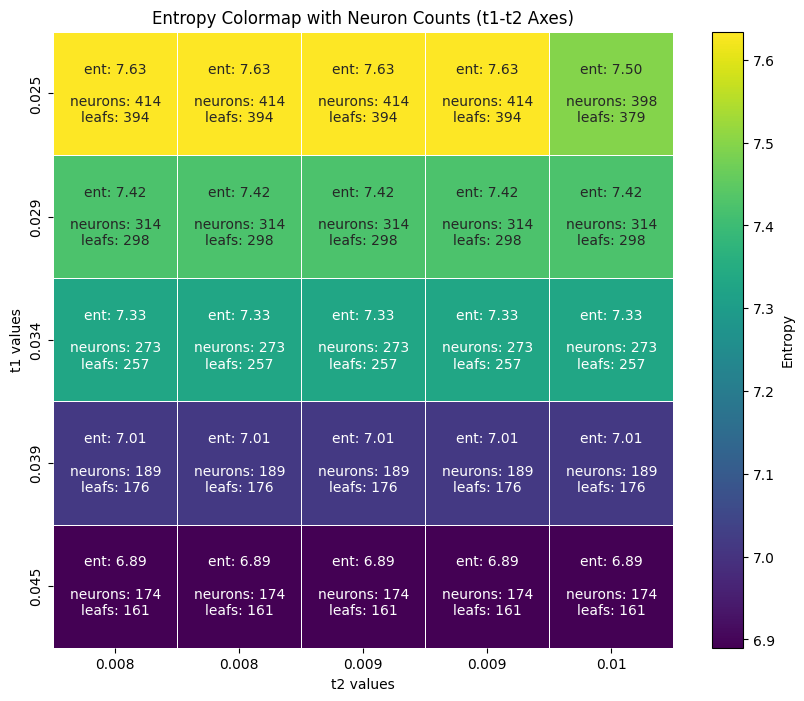

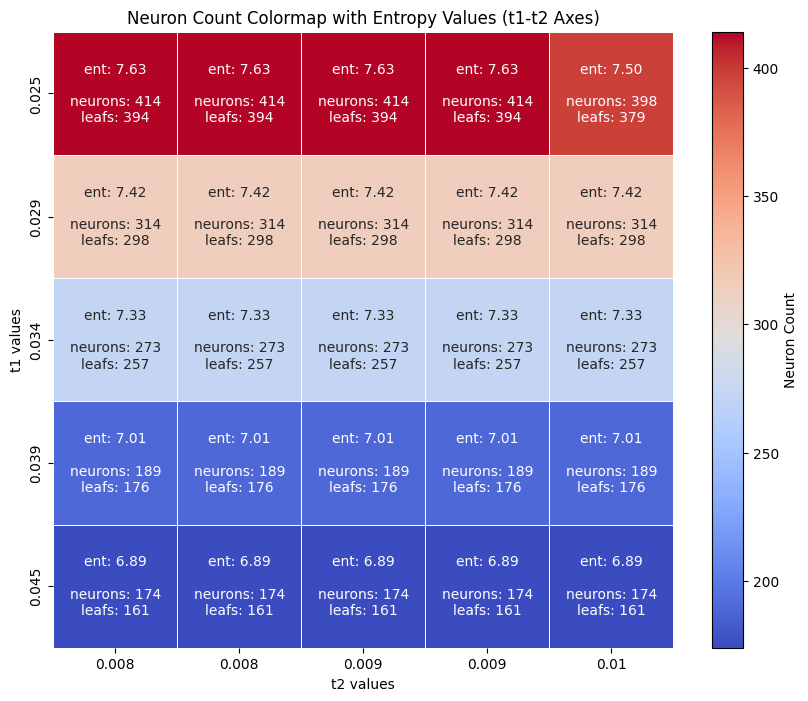

Minimum entropy: 6.89
Maximum entropy: 7.63


In [28]:
# Calculate entropy values for each t1-t2 pair
calculate_and_plot_entropy_and_neurons(mapped_units, log_scale_t1, log_scale_t2)

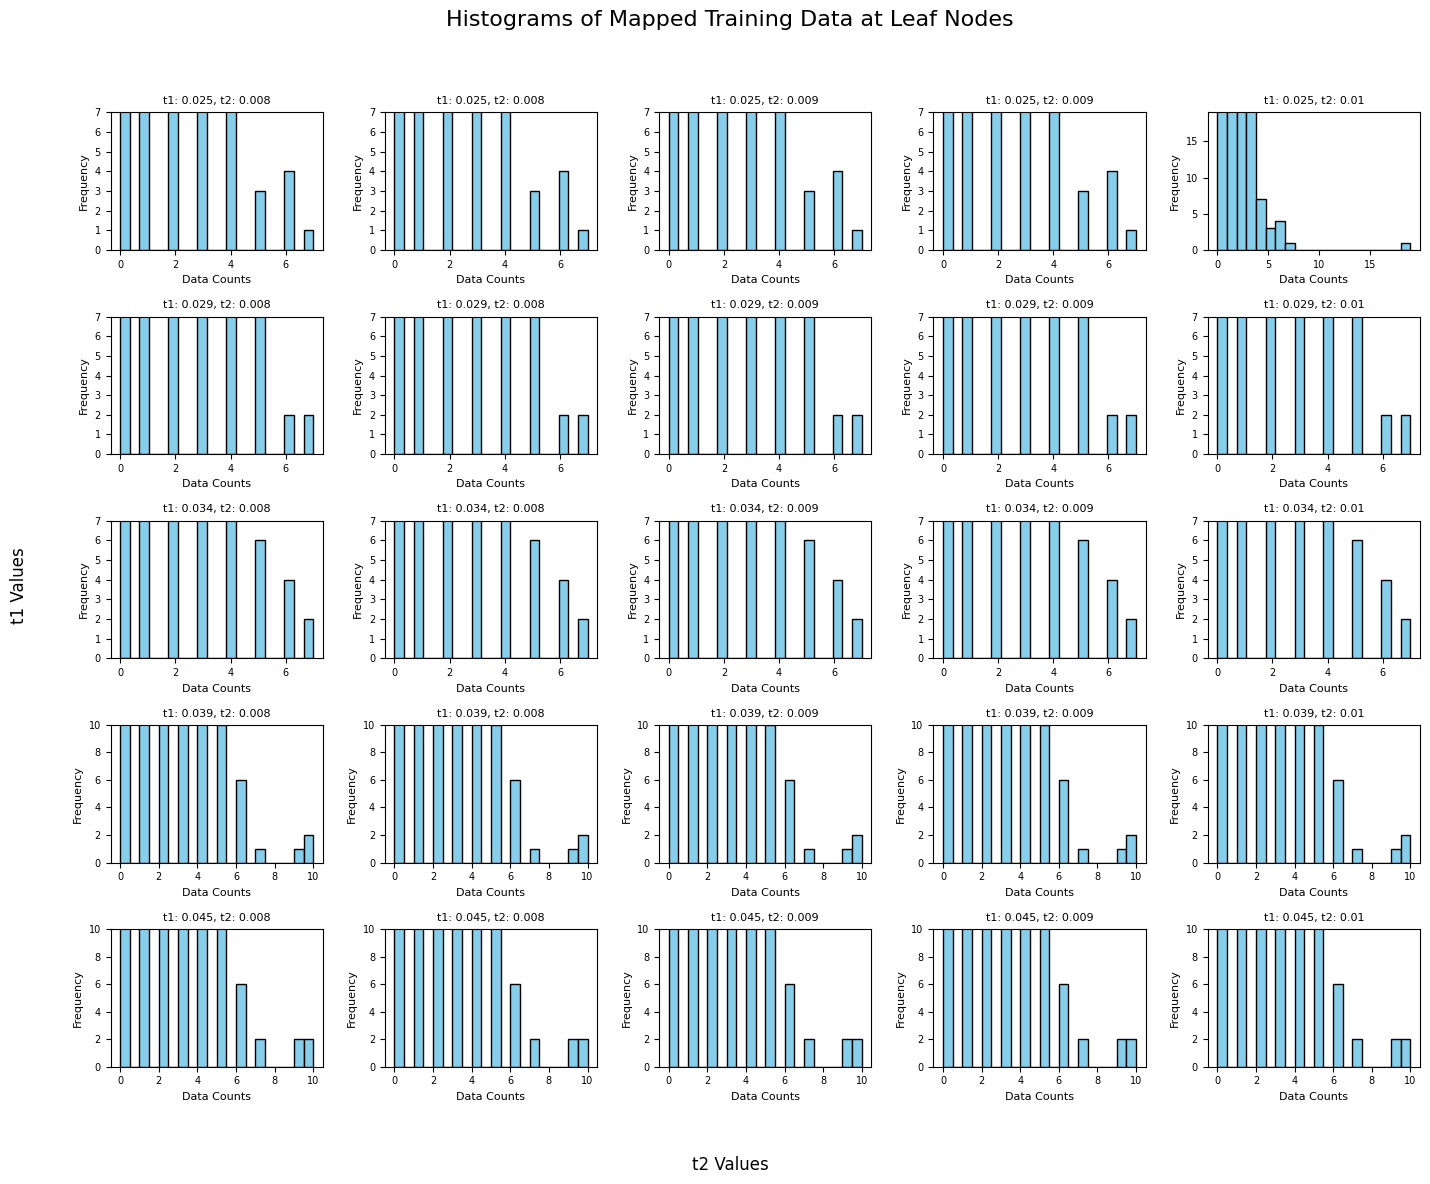

In [29]:
import matplotlib.pyplot as plt

def plot_histograms_for_leaf_data_with_individual_axes(mapped_units, log_scale_t1, log_scale_t2):
    """
    Plot histograms for the data counts at leaf nodes in a grid, with individual y-axis scaling
    and axis labels for each histogram. Display t1 and t2 values on the outer axes.
    
    :param mapped_units: Dictionary containing the mapped units (train and test) for each (t1_r, t2_r) pair
    :param log_scale_t1: List of t1 values used for the y-axis
    :param log_scale_t2: List of t2 values used for the x-axis
    """
    num_rows = len(log_scale_t1)
    num_cols = len(log_scale_t2)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), sharex=False, sharey=False)
    fig.suptitle("Histograms of Mapped Training Data at Leaf Nodes", fontsize=16)

    # Iterate over t1 and t2 values to create histograms for each parameter set
    for i, t1 in enumerate(log_scale_t1):
        for j, t2 in enumerate(log_scale_t2):
            t1_r = round(t1, 3)
            t2_r = round(t2, 3)

            # Access the train_mapped_zero_unit for the current (t1_r, t2_r) combination
            train_mapped_zero_unit = mapped_units.get((t1_r, t2_r), {}).get("train_mapped_zero_unit")
            
            ax = axes[i, j]
            if train_mapped_zero_unit:
                # Calculate data_mapped_counts for the leaf nodes
                metrics_for_zero_unit = calculate_leaf_neuron_metrics(train_mapped_zero_unit)
                data_mapped_counts = get_data_mapped_counts_list(metrics_for_zero_unit)

                # Plot histogram of data counts at leaf nodes with individual y-axis scaling
                ax.hist(data_mapped_counts, bins=20, color='skyblue', edgecolor='black')
                ax.set_title(f"t1: {t1_r}, t2: {t2_r}", fontsize=8)

                # Set y-axis limit based on the maximum count for this histogram
                if data_mapped_counts:
                    ax.set_ylim(0, max(data_mapped_counts))
            
            else:
                ax.text(0.5, 0.5, "N/A", ha='center', va='center', fontsize=10, color='red')
            
            # Include individual axis labels
            ax.set_xlabel("Data Counts", fontsize=8)
            ax.set_ylabel("Frequency", fontsize=8)
            ax.tick_params(axis='both', which='major', labelsize=7)
    
    # Set outer x and y labels for t1 and t2 values
    fig.supxlabel("t2 Values", fontsize=12)
    fig.supylabel("t1 Values", fontsize=12)
    
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.95])  # Adjust layout to fit everything neatly
    plt.show()

# Example usage
plot_histograms_for_leaf_data_with_individual_axes(mapped_units, log_scale_t1, log_scale_t2)

In [30]:
from prada.distribution import analyze_grouped_data_distribution_with_percentage
from prada.distribution import summarize_neuron_data_distribution

In [31]:
# access the train and test mapped zero units for a specific t1_r and t2_r
t1_r = 0.034  # Example rounded t1 value
t2_r = 0.008  # Example rounded t2 value

# or randomly select
#t1_r = round(log_scale_t1[0],3)  # Example rounded t1 value
#t2_r = round(log_scale_t2[0],3)  # Example rounded t2 value

train_mapped_zero_unit = mapped_units.get((t1_r, t2_r), {}).get("train_mapped_zero_unit")
test_mapped_zero_unit = mapped_units.get((t1_r, t2_r), {}).get("test_mapped_zero_unit")
zero_unit = mapped_units.get((t1_r, t2_r), {}).get("zero_unit")

if train_mapped_zero_unit and test_mapped_zero_unit:
    print(f"Successfully accessed mapped units for t1={t1_r}, t2={t2_r}")
else:
    print(f"No mapped units found for t1={t1_r}, t2={t2_r}")

Successfully accessed mapped units for t1=0.034, t2=0.008


In [32]:
distribution_df = analyze_grouped_data_distribution_with_percentage(mapped_units, t1_r, t2_r)

# Display the result if available
if distribution_df is not None:
    display_scrollable_dataframe_with_sticky_header(distribution_df)

Grouped data distribution for t1: 0.034, t2: 0.008


In [33]:
summarize_neuron_data_distribution(mapped_units, t1_r, t2_r, 1)

Summary for t1: 0.034, t2: 0.008
Number of neurons with and more than 1 samples: 189
Number of neurons with and less than 1 samples: 68
Total number of leaf neurons: 257
Total number of samples: 412


In [34]:
count_total_neurons(train_mapped_zero_unit)

273

In [35]:
def plot_bar_plots_for_sample_distribution(mapped_units, log_scale_t1, log_scale_t2):
    """
    Plot bar plots for each t1 and t2 combination, showing the number of samples (x-axis)
    and the number of neurons (y-axis), adjusting the y-limits independently and avoiding
    overcrowded x-ticks.
    
    :param mapped_units: Dictionary containing the mapped units (train and test) for each (t1_r, t2_r) pair
    :param log_scale_t1: List of t1 values used for the y-axis
    :param log_scale_t2: List of t2 values used for the x-axis
    """
    num_rows = len(log_scale_t1)
    num_cols = len(log_scale_t2)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12), sharex=False, sharey=False)
    fig.suptitle("Bar Plots of Sample Distribution Across Neurons", fontsize=16)

    # Iterate over t1 and t2 values to create bar plots for each parameter set
    for i, t1 in enumerate(log_scale_t1):
        for j, t2 in enumerate(log_scale_t2):
            t1_r = round(t1, 3)
            t2_r = round(t2, 3)

            # Access the train_mapped_zero_unit for the current (t1_r, t2_r) combination
            train_mapped_zero_unit = mapped_units.get((t1_r, t2_r), {}).get("train_mapped_zero_unit")
            
            ax = axes[i, j]
            if train_mapped_zero_unit:
                # Calculate data_mapped_counts for the leaf nodes
                metrics_for_zero_unit = calculate_leaf_neuron_metrics(train_mapped_zero_unit)
                data_mapped_counts = get_data_mapped_counts_list(metrics_for_zero_unit)
                
                # Create a DataFrame to count the number of neurons with the same number of samples
                data_distribution = pd.DataFrame({'Data Points Mapped': data_mapped_counts})
                grouped_distribution = data_distribution.groupby('Data Points Mapped').size().reset_index(name='Number of Neurons')

                # Adjust y-limits independently using the maximum value
                max_neurons = grouped_distribution['Number of Neurons'].max()
                ax.set_ylim(0, max_neurons + 1)  # Add a small margin for better visibility

                # Plot bar plot
                ax.bar(grouped_distribution['Data Points Mapped'], grouped_distribution['Number of Neurons'], color='skyblue')
                ax.set_title(f"t1: {t1_r}, t2: {t2_r}", fontsize=8)
                ax.set_xlabel("Number of Samples", fontsize=8)
                ax.set_ylabel("Number of Neurons", fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=7)
                
                # Set x-ticks to avoid overcrowding
                x_ticks = range(len(grouped_distribution['Data Points Mapped']))
                if len(x_ticks) > 5:  # Display only a few x-ticks if there are many
                    x_ticks = x_ticks[::5]  # Select every nth tick
                ax.set_xticks(x_ticks)
            else:
                ax.text(0.5, 0.5, "N/A", ha='center', va='center', fontsize=10, color='red')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit everything neatly
    plt.show()


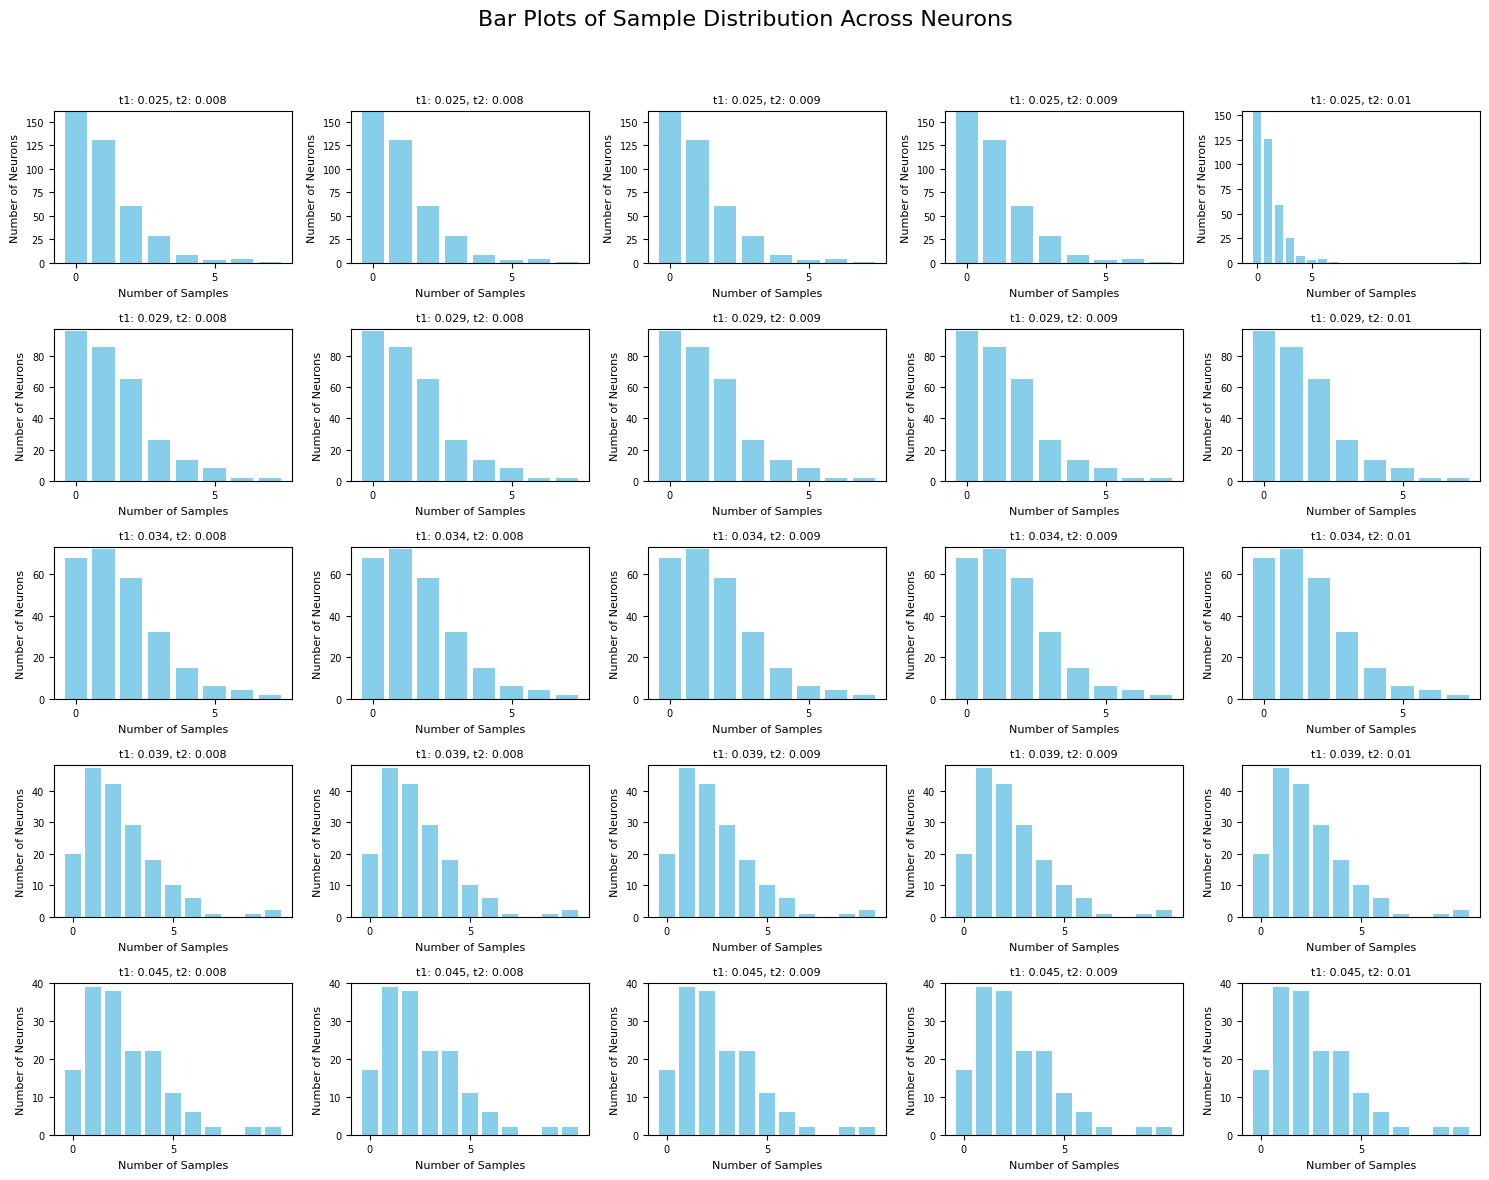

In [36]:
plot_bar_plots_for_sample_distribution(mapped_units, log_scale_t1, log_scale_t2)

In [37]:
metrics_for_zero_unit = calculate_leaf_neuron_metrics(train_mapped_zero_unit)
# Assuming leaf_metrics is the dictionary with metrics for all leaf neurons
data_mapped_counts = get_data_mapped_counts_list(metrics_for_zero_unit)
print("List of data_mapped_count values:", data_mapped_counts)

List of data_mapped_count values: [2, 6, 4, 1, 3, 1, 0, 2, 2, 3, 3, 1, 2, 1, 1, 1, 5, 2, 2, 1, 6, 2, 0, 2, 1, 0, 1, 3, 1, 4, 1, 5, 1, 3, 2, 1, 2, 1, 0, 2, 3, 1, 1, 0, 4, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 4, 1, 3, 2, 0, 2, 2, 0, 2, 1, 3, 1, 0, 0, 0, 0, 3, 2, 3, 1, 6, 3, 0, 0, 1, 4, 0, 2, 0, 3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 7, 1, 2, 3, 0, 2, 0, 1, 4, 1, 2, 2, 0, 3, 6, 1, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 7, 0, 0, 3, 0, 2, 0, 0, 2, 2, 1, 0, 0, 3, 4, 1, 2, 0, 1, 3, 1, 1, 0, 2, 0, 2, 2, 1, 4, 3, 2, 1, 1, 4, 0, 2, 0, 0, 4, 2, 2, 3, 0, 4, 0, 2, 0, 2, 5, 0, 0, 1, 5, 3, 2, 4, 2, 0, 0, 2, 2, 1, 5, 0, 0, 0, 5, 0, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 0, 1, 3, 1, 3, 4, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 4, 1, 0, 0, 1, 3, 2, 0, 2, 2, 3, 0, 3, 0, 1, 2, 3, 3, 1, 2, 1, 2, 0, 4, 1, 2, 2, 2, 2, 0, 2, 3, 2, 0]


In [38]:
# Example usage: calculating neighborhood distances for the map at level 0 (zero_unit.child_map)
if zero_unit.child_map and hasattr(zero_unit.child_map, 'neurons'):
    neighborhood_distances_array = calculate_neighborhood_distances_for_map(zero_unit.child_map)
    print(neighborhood_distances_array)

[[2.01307366 2.87374416 4.86386078]
 [2.45068329 3.1385322  3.73888775]
 [3.16905077 2.89842286 3.15617041]
 [3.12784893 2.797959   2.49148168]
 [3.7141439  2.31426912 2.27483809]]


In [39]:
from prada.plotting import print_tree_structure, get_neuron_by_position_list

In [40]:
print_tree_structure(train_mapped_zero_unit)

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 412
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 28
  |    |  Level: 2, Position: (0, 0), Number of data: 2
  |    |  Level: 2, Position: (0, 1), Number of data: 3
  |    |  Level: 2, Position: (0, 2), Number of data: 3
  |    |  Level: 2, Position: (0, 3), Number of data: 1
  |    |  Level: 2, Position: (1, 0), Number of data: 4
  |    |  Level: 2, Position: (1, 1), Number of data: 3
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 1
  |    |  Level: 2, Position: (2, 0), Number of data: 6
  |    |  Level: 2, Position: (2, 1), Number of data: 1
  |    |  Level: 2, Position: (2, 2), Number of data: 2
  |    |  Level: 2, Position: (2, 3), Number of data: 2
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 23
  |    |  Level: 2, Position: (0, 0), Number of data: 1
  |    |  Level: 2, Position: (0, 1), Number of 

In [41]:
neu = get_neuron_by_position_list(zero_unit, [(0, 0)]) # child neuron at position (0, 0).

In [42]:
def map_neuron_to_bmus(zero_unit, dataset_id_to_name):
    """
    Input: zero_unit, dataset_id_to_name
    Output: a dataframe with columns:
    Data Point Index	BMU Position	BMU Distance	Class Label	Class Name
    """
    data_info = []

    # Loop through the data indices stored in the root neuron
    for idx in zero_unit.input_indices:
        pos_list = [zero_unit.position]  # Store the position of the neuron in level 0
        current_neuron = zero_unit

        # Traverse down through the child maps if the neuron has children
        while hasattr(current_neuron, 'child_map') and current_neuron.child_map and current_neuron.child_map.neurons:
            # Find the winner neuron for this data point in the current neuron map
            winner_neurons, _ = current_neuron.child_map.winner_neuron(np.array([zero_unit.input_dataset[idx]]))
            current_neuron = winner_neurons[0]
            pos_list.append(current_neuron.position)

        # Collect BMU distance and class label (based on the neuron's input_labels)
        bmu_distance = current_neuron.activation(np.array([zero_unit.input_dataset[idx]]))[0]  # Get distance to the BMU

        # Retrieve the class label and name from the neuron itself
        if current_neuron.input_labels is not None and len(current_neuron.input_labels) > 0:
            class_label = current_neuron.input_labels[current_neuron.input_indices.tolist().index(idx)]
            class_name = dataset_id_to_name[class_label]
        else:
            class_label = "Unknown"
            class_name = "Unknown"

        data_info.append({
            'Data Point Index': idx,
            'BMU Position': pos_list,
            'BMU Distance': bmu_distance,
            'Class Label': class_label,  # Add class label (ID)
            'Class Name': class_name     # Add class name (translated from label)
        })

    # Return the data as a DataFrame
    df = pd.DataFrame(data_info)
    return df

In [43]:
df_bmus = map_neuron_to_bmus(test_mapped_zero_unit, dataset_id_to_name)
df_bmus

Data Point Index              BMU Position  BMU Distance  Class Label  \
0                   0  [(0, 0), (1, 2), (0, 1)]      1.576537            1   
1                   1  [(0, 0), (1, 1), (3, 1)]      0.871848            1   
2                   2  [(0, 0), (4, 2), (4, 2)]      1.243320            1   
3                   3  [(0, 0), (3, 2), (0, 0)]      1.249701            1   
4                   4  [(0, 0), (4, 0), (0, 0)]      3.084999            1   
..                ...                       ...           ...          ...   
837               837  [(0, 0), (0, 2), (0, 0)]      0.937732            6   
838               838  [(0, 0), (0, 2), (0, 0)]      3.199145            6   
839               839  [(0, 0), (0, 2), (2, 0)]      3.254531            6   
840               840  [(0, 0), (4, 1), (1, 0)]      1.258865            6   
841               841  [(0, 0), (4, 2), (5, 2)]      1.511287            6   

     Class Name  
0    HR-Typical  
1    HR-Typical  
2    HR-Typical  
3    HR-Typical  
4    HR-Typical  
..          ...  
837       Conte  
838       Conte  
839       Conte  
840       Conte  
841       Conte  

[842 rows x 5 columns]

In [44]:
dataset_counts = df_bmus['Class Name'].value_counts()
dataset_counts

Class Name
Conte            444
ABCD-ASD         161
HR-Typical       106
IBIS-ASD          65
Atypical          38
Down Syndrome     28
Name: count, dtype: int64

In [45]:
df_bmus_str = df_bmus.copy()
df_bmus_str['BMU Position'] = df_bmus['BMU Position'].apply(lambda x: str(x))

In [46]:
df_bmus_str # BMU Position is str, instead of list (unhashable type: 'list')

Data Point Index              BMU Position  BMU Distance  Class Label  \
0                   0  [(0, 0), (1, 2), (0, 1)]      1.576537            1   
1                   1  [(0, 0), (1, 1), (3, 1)]      0.871848            1   
2                   2  [(0, 0), (4, 2), (4, 2)]      1.243320            1   
3                   3  [(0, 0), (3, 2), (0, 0)]      1.249701            1   
4                   4  [(0, 0), (4, 0), (0, 0)]      3.084999            1   
..                ...                       ...           ...          ...   
837               837  [(0, 0), (0, 2), (0, 0)]      0.937732            6   
838               838  [(0, 0), (0, 2), (0, 0)]      3.199145            6   
839               839  [(0, 0), (0, 2), (2, 0)]      3.254531            6   
840               840  [(0, 0), (4, 1), (1, 0)]      1.258865            6   
841               841  [(0, 0), (4, 2), (5, 2)]      1.511287            6   

     Class Name  
0    HR-Typical  
1    HR-Typical  
2    HR-Typical  
3    HR-Typical  
4    HR-Typical  
..          ...  
837       Conte  
838       Conte  
839       Conte  
840       Conte  
841       Conte  

[842 rows x 5 columns]

In [47]:
bmucounts = df_bmus_str[['BMU Position', 'Class Name']].groupby(['BMU Position']).value_counts().reset_index(level=-1, name='count')
bmucounts

Class Name  count
BMU Position                               
[(0, 0), (0, 0), (0, 0)]       Conte      4
[(0, 0), (0, 0), (0, 0)]    ABCD-ASD      2
[(0, 0), (0, 0), (0, 1)]    ABCD-ASD      1
[(0, 0), (0, 0), (1, 0)]       Conte      1
[(0, 0), (0, 0), (1, 1)]    ABCD-ASD      2
...                              ...    ...
[(0, 0), (4, 2), (5, 2)]  HR-Typical      2
[(0, 0), (4, 2), (5, 2)]    IBIS-ASD      1
[(0, 0), (4, 2), (5, 3)]  HR-Typical      4
[(0, 0), (4, 2), (5, 3)]       Conte      3
[(0, 0), (4, 2), (5, 3)]    IBIS-ASD      1

[299 rows x 2 columns]

In [48]:
# Define markers and colors for test data categories
markers = {
    "Down Syndrome": "v",  # triangle
    "IBIS-ASD": "*",       # star
    "ABCD-ASD": "*",       # star
    "Conte": "^",       # triangle up
    "HR-Typical": "o",     # circle
    "Atypical": "D"        # diamond
}
colors = {
    "Down Syndrome": "#e41a1c",  # red
    "HR-Typical": "#7fc97f",     # green
    "IBIS-ASD": "#fdc076",       # orange
    "ABCD-ASD": "#fd76f4",       # pink
    "Conte": "#ffff99",          # yellow
    "Atypical": "#a6cee3"        # blue
}

In [49]:
from matplotlib.colors import LinearSegmentedColormap

# Truncate the colormap to focus on lighter tones
def truncate_colormap(cmap, minval=0.5, maxval=1.0, n=256):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(maxval, minval, n))
    )
    return new_cmap

# Use a truncated colormap focusing on lighter tones of "Blues"
colormap_defined = truncate_colormap(plt.cm.Purples, minval=0.05, maxval=0.5)

In [50]:
## Keep only the samples with identifiers in the key_list. We keep 55 of total 65 samples.
## (keeping samples having only ASD diagnosis).

key_list = [
    'IBIS160209','IBIS389521','IBIS107524','IBIS903923','IBIS152174','IBIS396346','IBIS460612','IBIS515353','IBIS680028','IBIS830319','IBIS569748',
    'IBIS108131','IBIS373485','IBIS845807','IBIS910593','IBIS919979','IBIS155712','IBIS929204','IBIS973338','IBIS174982','IBIS983222','IBIS230955',
    'IBIS988197','IBIS235108','IBIS988903','IBIS241033','IBIS291809','IBIS336576','IBIS389101','IBIS391729','IBIS402809','IBIS439857','IBIS447754',
    'IBIS456823','IBIS463809','IBIS482642','IBIS490878','IBIS544847','IBIS552855','IBIS553295','IBIS597653','IBIS603076','IBIS628043','IBIS638999',
    'IBIS641078','IBIS649998','IBIS784198','IBIS809318','IBIS816236','IBIS841812','IBIS930203','IBIS931343','IBIS943489','IBIS950194','IBIS963992'
        ]

In [51]:
len(key_list)

55

In [52]:
from prada.plotting2 import plot_map_with_quad, plot_map_with_test_data, plot_map_with_test_data_significant_bmus
from prada.plotting2 import plot_map_with_test_data_markers, plot_map_with_ibis_asd_samples, plot_map_with_selected_asd_samples, plot_map_with_abcd_asd_samples

In [53]:
def plot1(zero_unit, dataset_id_to_name=dataset_id_to_name):
    if zero_unit.child_map and hasattr(zero_unit.child_map, 'neurons'):
        plot_map_with_quad(zero_unit.child_map, dataset_id_to_name)
    else:
        print("Neuron has NO child map")

def plot2(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, markers=markers, colors=colors):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_test_data(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, markers, colors)
    else:
        print("Neuron has NO child map")

def plot3(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, percent_threshold=10, markers=markers, colors=colors):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_test_data_significant_bmus(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, percent_threshold, markers, colors)
    else:
        print("Neuron has NO child map")

def plot4(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, percent_threshold=10, markers=markers, colors=colors):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_test_data_markers(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, percent_threshold, markers, colors)
    else:
        print("Neuron has NO child map")

def plot5(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, colormap_defined=colormap_defined):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_ibis_asd_samples(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, colormap_defined)
    else:
        print("Neuron has NO child map")

def plot6(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, key_list=key_list, marker_size=200, colormap_defined=colormap_defined):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_selected_asd_samples(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, key_list, marker_size=marker_size, colormap_defined=colormap_defined)
    else:
        print("Neuron has NO child map")

def plot7(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, key_list=key_list, marker_size=200, colormap_defined=colormap_defined):
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_abcd_asd_samples(trained_zero_unit.child_map, test_zero_unit.child_map, dataset_id_to_name, key_list, marker_size=marker_size, colormap_defined=colormap_defined)
        print("Neuron has NO child map")


## Color based on scanner type and sex: ASD

In [54]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_asd = pd.read_csv("batches/batches_abcd_asd_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_asd['mri_info_manufacturer_model'] = (
    merged_abcd_asd['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_asd['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_asd_scanner_dict = merged_abcd_asd.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_asd_sex_dict = merged_abcd_asd.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [55]:
set(abcd_asd_scanner_dict.values())

{'GE MEDICAL SYSTEMS | DISCOVERY MR750',
 'Philips Medical Systems | Achieva dStream',
 'Philips Medical Systems | Ingenia',
 'SIEMENS | Prisma',
 'SIEMENS | Prisma_fit'}

In [56]:
# Load the vsa_final CSV file.
vsa_final = pd.read_csv("batches/batches_ibis_asd_cols_site_sex.csv")

# Create a dictionary mapping "ID" to "Identifiers_first3".
ibis_asd_site_dict = vsa_final.set_index("ID")["Identifiers_first3"].to_dict()

# Create a dictionary mapping "ID" to "VSA demographics,Sex".
ibis_asd_sex_dict = vsa_final.set_index("ID")["VSA demographics,Sex"].to_dict()

## Color based on scanner, model and sex : Inlier

In [57]:
# Load the vsa_final CSV file.
vsa_final_inlier = pd.read_csv("batches/batches_ibis_inlier_cols_site_sex.csv")

# Create a dictionary mapping "ID" to "Identifiers_first3".
ibis_inlier_site_dict = vsa_final_inlier.set_index("ID")["Identifiers_first3"].to_dict()

# Create a dictionary mapping "ID" to "VSA demographics,Sex".
ibis_inlier_sex_dict = vsa_final_inlier.set_index("ID")["VSA demographics,Sex"].to_dict()

In [58]:
# Load the CSV file back into a DataFrame. mri_info_manufacturersmn
merged_abcd_inlier = pd.read_csv("batches/batches_abcd_inlier_cols_scanner_model_sex.csv")

# new column by concatenating the two existing columns 
merged_abcd_inlier['mri_info_manufacturer_model'] = (
    merged_abcd_inlier['mri_info_manufacturer'].astype(str) +
    " | " +
    merged_abcd_inlier['mri_info_manufacturersmn'].astype(str)
)

# Create a dictionary mapping "src_subject_id" to "mri_info_manufacturer".
abcd_inlier_scanner_dict = merged_abcd_inlier.set_index("src_subject_id")["mri_info_manufacturer_model"].to_dict()

# Create a dictionary mapping "src_subject_id" to "demo_sex_v2".
abcd_inlier_sex_dict = merged_abcd_inlier.set_index("src_subject_id")["demo_sex_v2"].to_dict()

In [59]:
from prada.plotting2 import plot_map_with_selected_asd_samples_batches, plot_map_with_selected_inlier_samples_batches, plot_map_with_abcd_asd_samples_batches, plot_map_with_abcd_inlier_samples_batches

In [60]:
def plot8(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, key_list=key_list, ibis_asd_site_dict=ibis_asd_site_dict, ibis_asd_sex_dict=ibis_asd_sex_dict, marker_size=200, colormap_defined=colormap_defined):
    print("IBIS-ASD")
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_selected_asd_samples_batches(trained_zero_unit.child_map, test_zero_unit.child_map,
                                                     dataset_id_to_name, key_list, ibis_asd_site_dict, ibis_asd_sex_dict, marker_size=marker_size, colormap_defined=colormap_defined)
    else:
        print("Neuron has NO child map")

def plot8_2(trained_zero_unit, test_zero_unit, dataset_id_to_name=dataset_id_to_name, key_list=key_list, ibis_inlier_site_dict=ibis_inlier_site_dict, ibis_inlier_sex_dict=ibis_inlier_sex_dict, marker_size=200, colormap_defined=colormap_defined):
    print("LR-Typical")
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_selected_inlier_samples_batches(trained_zero_unit.child_map, test_zero_unit.child_map,
                                                     dataset_id_to_name, key_list, ibis_inlier_site_dict, ibis_inlier_sex_dict, marker_size=marker_size, colormap_defined=colormap_defined)
    else:
        print("Neuron has NO child map")

def plot9(trained_zero_unit, test_zero_unit,
          dataset_id_to_name=dataset_id_to_name,
          key_list=key_list,
          abcd_asd_scanner_dict=abcd_asd_scanner_dict,
          marker_size=200, 
          colormap_defined=colormap_defined):
    print("ABCD_ASD")
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_abcd_asd_samples_batches(
            trained_zero_unit.child_map,
            test_zero_unit.child_map,
            dataset_id_to_name,
            key_list,
            abcd_asd_scanner_dict,      # only this dict
            marker_size=marker_size,
            colormap_defined=colormap_defined
        )
    else:
        print("Neuron has NO child map")


def plot10(
    trained_zero_unit,
    test_zero_unit,
    dataset_id_to_name=dataset_id_to_name,
    key_list=key_list,
    abcd_inlier_scanner_dict=abcd_inlier_scanner_dict,
    marker_size=200
):
    print("ABCD_INLIER")
    if trained_zero_unit.child_map and hasattr(trained_zero_unit.child_map, 'neurons'):
        plot_map_with_abcd_inlier_samples_batches(
            trained_zero_unit.child_map,
            test_zero_unit.child_map,
            dataset_id_to_name,
            key_list,
            abcd_inlier_scanner_dict,
            marker_size=marker_size,
            colormap_defined=colormap_defined
        )
    else:
        print("Neuron has NO child map")


In [61]:
def get_and_plot_neuron_by_position_list(train_mapped_zero_unit,test_mapped_zero_unit, position_list, marker_size=200):
    neuron_tr = get_neuron_by_position_list(train_mapped_zero_unit, position_list)
    neuron_te = get_neuron_by_position_list(test_mapped_zero_unit, position_list)

    print(f"Neuron at: (0,0) {position_list} \n")    
    print("===> TRAIN tree structure:\n")
    print_tree_structure(train_mapped_zero_unit)
    plot1(neuron_tr)
    print("===> TEST tree structure:\n")
    print_tree_structure(test_mapped_zero_unit)
    plot2(neuron_tr,neuron_te)
    plot3(neuron_tr,neuron_te)
    plot4(neuron_tr,neuron_te)
    plot5(neuron_tr,neuron_te)
    plot6(neuron_tr,neuron_te, marker_size=marker_size)
    plot7(neuron_tr,neuron_te, marker_size=marker_size)
    plot8(neuron_tr,neuron_te, marker_size=marker_size)
    plot8_2(neuron_tr,neuron_tr, marker_size=marker_size)
    plot9(neuron_tr,neuron_te, marker_size=marker_size)
    plot10(neuron_tr,neuron_tr, marker_size=marker_size)

Neuron at: (0,0) [] 

===> TRAIN tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 412
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 28
  |    |  Level: 2, Position: (0, 0), Number of data: 2
  |    |  Level: 2, Position: (0, 1), Number of data: 3
  |    |  Level: 2, Position: (0, 2), Number of data: 3
  |    |  Level: 2, Position: (0, 3), Number of data: 1
  |    |  Level: 2, Position: (1, 0), Number of data: 4
  |    |  Level: 2, Position: (1, 1), Number of data: 3
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 1
  |    |  Level: 2, Position: (2, 0), Number of data: 6
  |    |  Level: 2, Position: (2, 1), Number of data: 1
  |    |  Level: 2, Position: (2, 2), Number of data: 2
  |    |  Level: 2, Position: (2, 3), Number of data: 2
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 23
  |    |  Level: 2, Position: (0, 0), Number of data: 

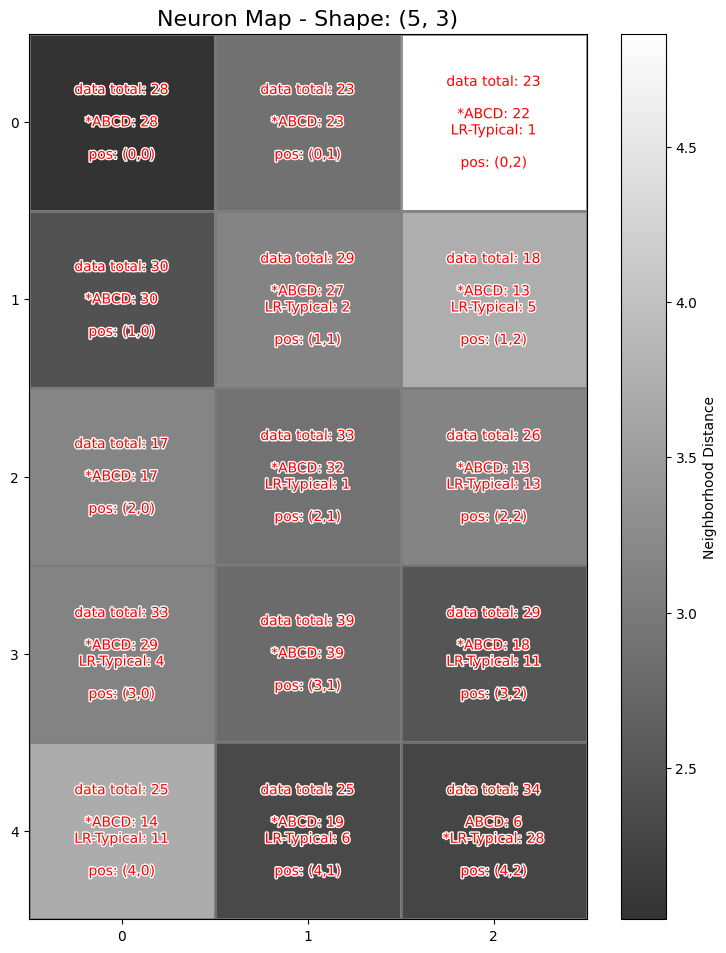

===> TEST tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 842
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 27
  |    |  Level: 2, Position: (0, 0), Number of data: 6
  |    |  Level: 2, Position: (0, 1), Number of data: 1
  |    |  Level: 2, Position: (0, 2), Number of data: 0
  |    |  Level: 2, Position: (0, 3), Number of data: 0
  |    |  Level: 2, Position: (1, 0), Number of data: 1
  |    |  Level: 2, Position: (1, 1), Number of data: 2
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 0
  |    |  Level: 2, Position: (2, 0), Number of data: 14
  |    |  Level: 2, Position: (2, 1), Number of data: 2
  |    |  Level: 2, Position: (2, 2), Number of data: 1
  |    |  Level: 2, Position: (2, 3), Number of data: 0
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 4
  |    |  Level: 2, Position: (0, 0), Number of data: 0
  |    |  Level: 2, P

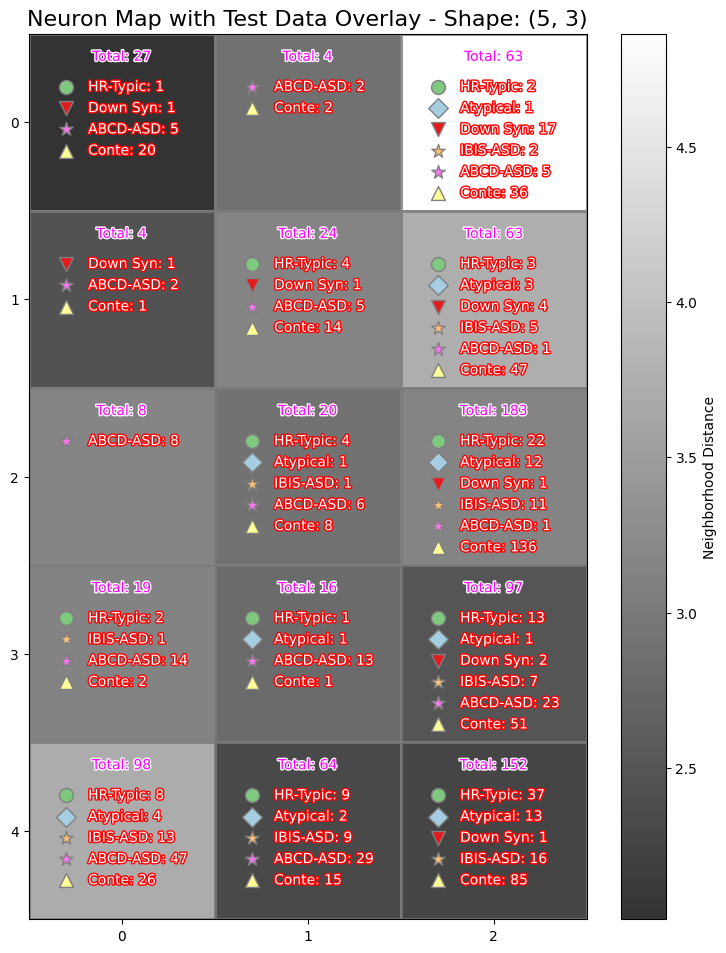

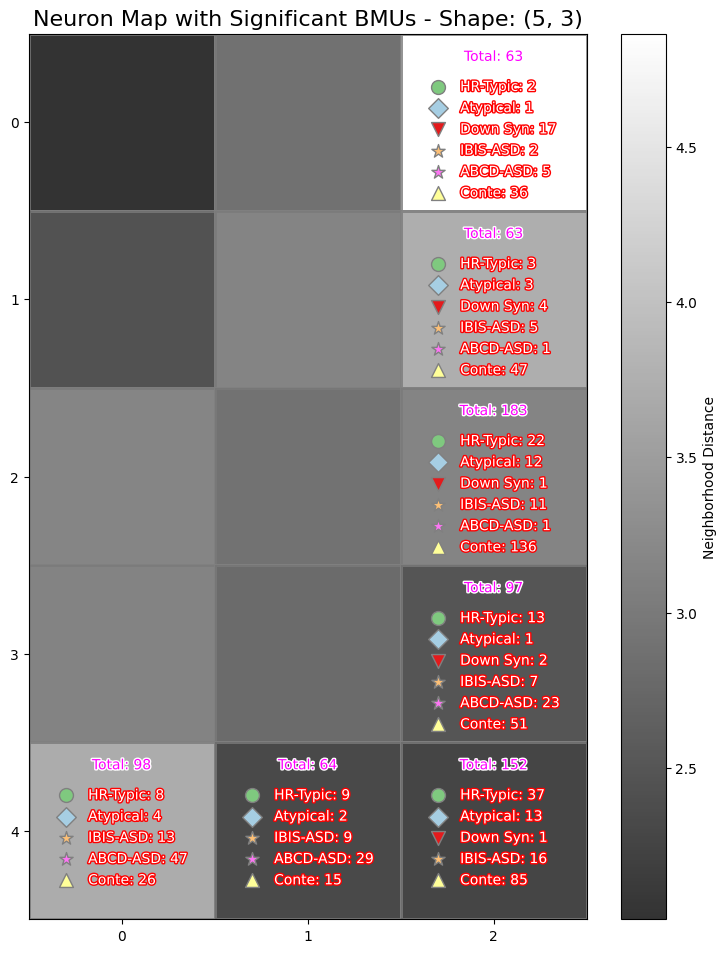

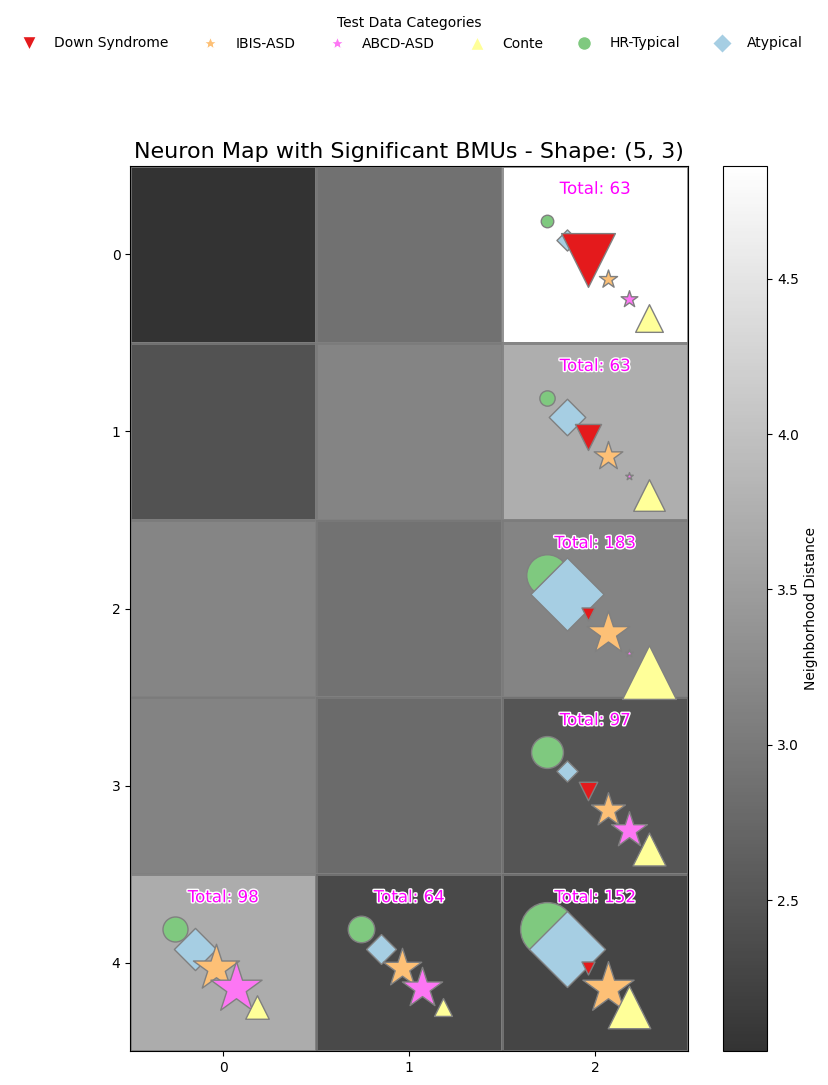

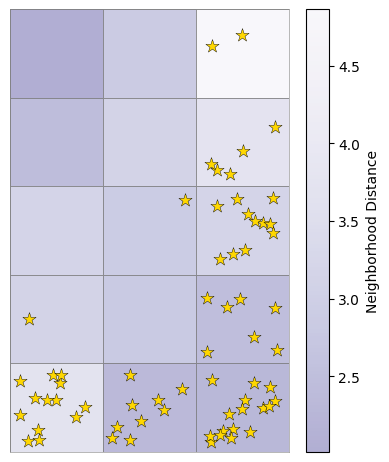

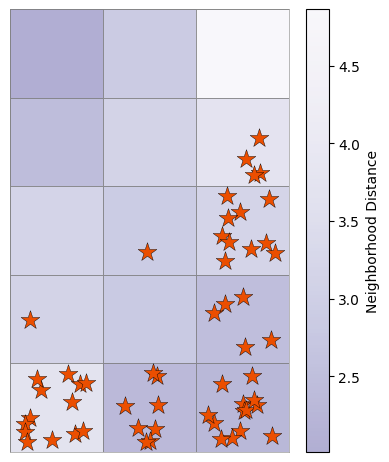

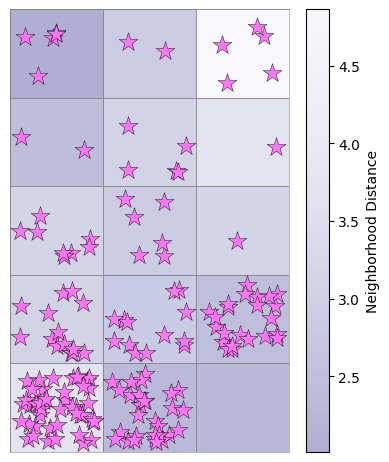

Neuron has NO child map
IBIS-ASD


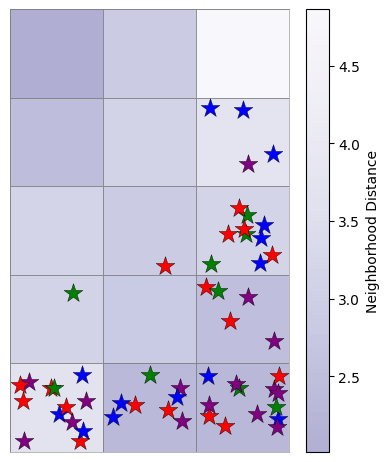

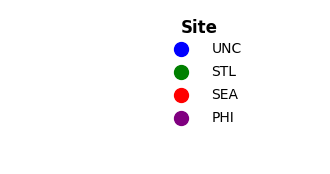

LR-Typical


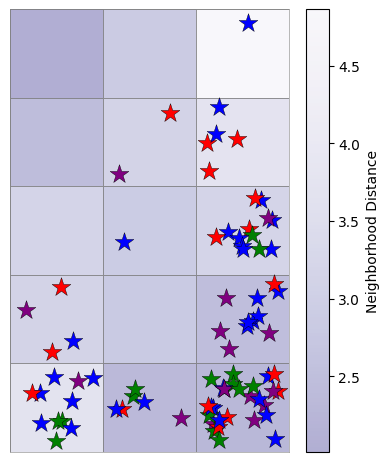

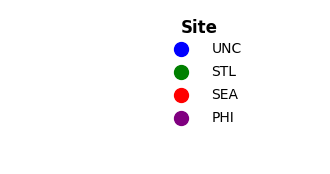

ABCD_ASD


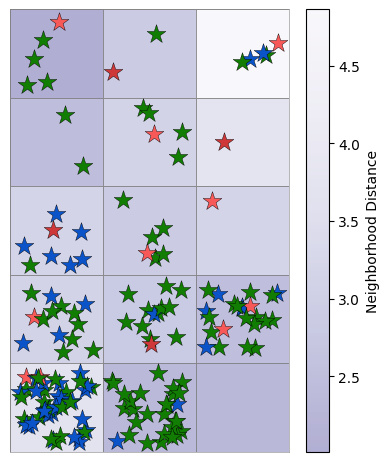

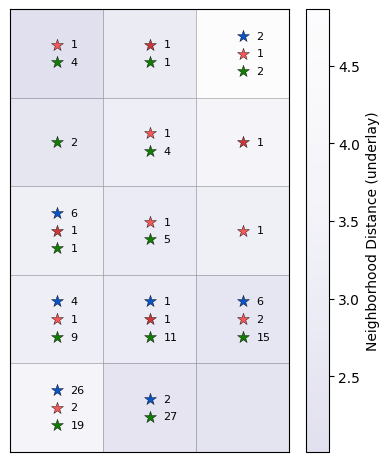

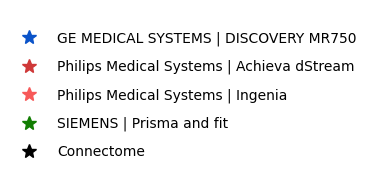

ABCD_INLIER


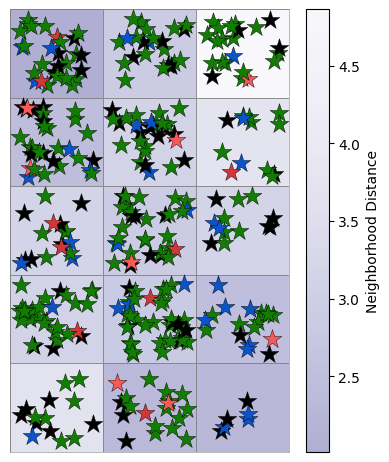

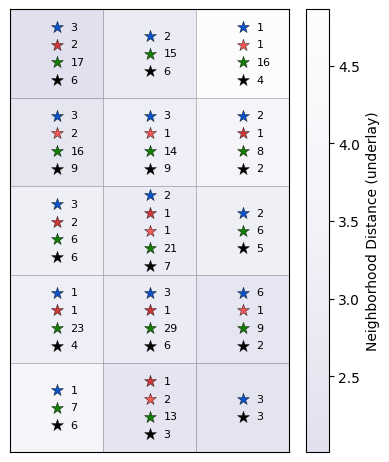

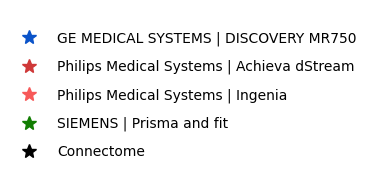

In [62]:
position_list = []

get_and_plot_neuron_by_position_list(train_mapped_zero_unit,test_mapped_zero_unit, position_list, marker_size=200)

In [63]:
def calculate_total_mapped_data(leaf_metrics):
    """
    Sum the 'data_mapped_count' from the leaf metrics to calculate the total number of mapped data points.
    
    :param leaf_metrics: Dictionary containing metrics for all leaf neurons
    :return: Total number of mapped data points
    """
    total_mapped_data = sum(metrics["data_mapped_count"] for metrics in leaf_metrics.values() if "data_mapped_count" in metrics)
    return total_mapped_data

total_mapped_data = calculate_total_mapped_data(metrics_for_zero_unit)
print("Total mapped data points:", total_mapped_data)

inlier_data.shape, total_mapped_data

Total mapped data points: 412


((412, 20), 412)

In [64]:
len(data_mapped_counts)

257

# Test 2 --- jump

In [65]:
mapped_idx = get_neuron_by_position_list(test_mapped_zero_unit,[]).input_indices
len(mapped_idx), test_identifiers[mapped_idx]

(842,
 array(['IBIS530721', 'IBIS130523', 'IBIS548690', 'IBIS131614',
        'IBIS540777', 'IBIS136360', 'IBIS549587', 'IBIS136846',
        'IBIS565029', 'IBIS137726', 'IBIS568175', 'IBIS141335',
        'IBIS613004', 'IBIS144896', 'IBIS618875', 'IBIS145656',
        'IBIS621892', 'IBIS179886', 'IBIS636817', 'IBIS189601',
        'IBIS636881', 'IBIS191896', 'IBIS638943', 'IBIS213043',
        'IBIS650503', 'IBIS216279', 'IBIS658909', 'IBIS220411',
        'IBIS675255', 'IBIS220416', 'IBIS685724', 'IBIS221751',
        'IBIS693153', 'IBIS224012', 'IBIS710239', 'IBIS229701',
        'IBIS713824', 'IBIS232791', 'IBIS749359', 'IBIS235125',
        'IBIS763676', 'IBIS247315', 'IBIS769118', 'IBIS280066',
        'IBIS788407', 'IBIS300333', 'IBIS798424', 'IBIS301941',
        'IBIS802785', 'IBIS303247', 'IBIS806356', 'IBIS309070',
        'IBIS810313', 'IBIS323623', 'IBIS812952', 'IBIS336398',
        'IBIS822794', 'IBIS337032', 'IBIS823104', 'IBIS347302',
        'IBIS831855', 'IBIS360421'

In [66]:
mapped_labels = get_neuron_by_position_list(test_mapped_zero_unit,[]).input_labels
mapped_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [67]:
mapped_label_names = [dataset_id_to_name[i] for i in mapped_labels]
mapped_label_names

['HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typical',
 'HR-Typic

In [68]:
Data_cohort_VSA = pd.read_csv('spreadsheets/Data-cohort-VSA.csv')

In [69]:
Data_cohort_VSA.head()

VSA demographics,CandID VSA-CVD demographics,CandID VSA demographics,Cohort  \
0                  108131                      108131         IBIS2 High Risk   
1                  360421                           .         IBIS2 High Risk   
2                  105477                           .                   DS SA   
3                  110925                           .                   DS SA   
4                  123451                           .                   DS SA   

  VSA-CVD demographics,Cohort  
0             IBIS2 High Risk  
1                           .  
2                           .  
3                           .  
4                           .

In [70]:
test_identifiers = pd.DataFrame(test_identifiers)

In [71]:
import pandas as pd

# Extract the candidate ID from 'test_keys' DataFrame by removing the 'IBIS' prefix
test_identifiers['CandID'] = test_identifiers[0].str.replace('IBIS', '')

# Create empty columns in Data_cohort_VSA for the test keys and labels
Data_cohort_VSA['Test_Key'] = None
Data_cohort_VSA['Mapped_Label'] = None

# Iterate through the test_keys dataframe and mapped_label_names to place values in Data_cohort_VSA
for index, (test_key, label_name) in enumerate(zip(test_identifiers[0], mapped_label_names)):
    # Get the corresponding candidate ID without the 'IBIS' prefix
    candidate_id = test_key.replace('IBIS', '')

    # Find the row in Data_cohort_VSA where the candidate ID is located in either of the two columns
    matching_row = Data_cohort_VSA[
        (Data_cohort_VSA['VSA demographics,CandID'] == candidate_id) | 
        (Data_cohort_VSA['VSA-CVD demographics,CandID'] == candidate_id)
    ]

    # If a match is found, place the test_key and label_name in the appropriate columns
    if not matching_row.empty:
        Data_cohort_VSA.loc[matching_row.index, 'Test_Key'] = test_key
        Data_cohort_VSA.loc[matching_row.index, 'Mapped_Label'] = label_name

In [72]:
# Add the Index column
Data_cohort_VSA['Index'] = range(1, len(Data_cohort_VSA) + 1)

# Move the 'Index' column to the first position
Data_cohort_VSA.insert(0, 'Index', Data_cohort_VSA.pop('Index'))

In [73]:
display_scrollable_dataframe_with_sticky_header(Data_cohort_VSA)

In [74]:
def extract_data_for_specific_child_map_with_bmu_distances(neuron_with_child_map, dataset_id_to_name):
    """
    Extracts mapped positions, labels, indices, identifiers, label names, and BMU distances for samples
    in a specified child map, handling cases where certain neurons may lack input datasets.
    
    :param neuron_with_child_map: The neuron whose child map we want to inspect
    :param dataset_id_to_name: A dictionary mapping dataset IDs to their names
    :return: DataFrame with mapped positions, input labels, indices, identifiers, label names, and BMU distances
    """
    data = []

    # Traverse the neurons in the specified child map
    if hasattr(neuron_with_child_map, 'child_map') and neuron_with_child_map.child_map:
        for pos, child_neuron in neuron_with_child_map.child_map.neurons.items():
            if child_neuron.input_labels is not None and len(child_neuron.input_labels) > 0:
                # Collect the mapped sample data for each child neuron
                for i, label in enumerate(child_neuron.input_labels):
                    # Get the label name using the mapping
                    label_name = dataset_id_to_name[label] if label in dataset_id_to_name else "Unknown"
                    
                    # Calculate the BMU distance for the sample
                    sample_data = np.array([neuron_with_child_map.input_dataset[child_neuron.input_indices[i]]])
                    bmu_distance = child_neuron.activation(sample_data)[0]  # Calculate distance to the BMU

                    data.append({
                        'Input Index': child_neuron.input_indices[i] if child_neuron.input_indices is not None else None,
                        'Mapped Position': pos,
                        'Identifier': child_neuron.input_identifiers[i] if child_neuron.input_identifiers is not None else None,
                        'Input Label': label,
                        'Label Name': label_name,
                        'BMU Distance': bmu_distance
                    })
    return pd.DataFrame(data)

# Example usage: Define the mapping dictionary and extract data with BMU distances
child_map_data_table = extract_data_for_specific_child_map_with_bmu_distances(test_mapped_zero_unit, dataset_id_to_name)

# Display the table
display_scrollable_dataframe_with_sticky_header(child_map_data_table)

In [75]:
# Example usage: Define the mapping dictionary and extract data with BMU distances
child_map_data_table_inliers = extract_data_for_specific_child_map_with_bmu_distances(train_mapped_zero_unit, dataset_id_to_name)

# Display the table
display_scrollable_dataframe_with_sticky_header(child_map_data_table_inliers)

In [ ]:
# SAVE
# child_map_data_table.to_csv('ghsom_outputs/bmus/parent_map_table_abcd_5x3_outliers.csv', index=False)
# child_map_data_table_inliers.to_csv('ghsom_outputs/bmus/parent_map_table_abcd_5x3_inliers.csv', index=False)

In [77]:
def extract_leaf_node_positions_with_bmu_distances(neuron_with_child_map, dataset_id_to_name):
    """
    Extracts mapped positions for samples only mapped to leaf nodes, 
    along with their labels, indices, identifiers, label names, and BMU distances.
    
    :param neuron_with_child_map: The neuron whose child map we want to inspect
    :param dataset_id_to_name: A dictionary mapping dataset IDs to their names
    :return: DataFrame with position lists for samples mapped to leaf nodes, 
             along with input labels, indices, identifiers, label names, and BMU distances
    """
    data = []

    # Recursive function to traverse the tree and gather mapped positions
    def traverse_and_collect_positions(neuron, position_list):
        if not hasattr(neuron, 'child_map') or not neuron.child_map:
            # This neuron is a leaf node
            if neuron.input_labels is not None and len(neuron.input_labels) > 0:
                # Collect data for each sample mapped to this leaf node
                for i, label in enumerate(neuron.input_labels):
                    # Get the label name using the mapping
                    label_name = dataset_id_to_name[label] if label in dataset_id_to_name else "Unknown"

                    # Calculate the BMU distance for the sample
                    sample_data = np.array([neuron_with_child_map.input_dataset[neuron.input_indices[i]]])
                    bmu_distance = neuron.activation(sample_data)[0]  # Calculate distance to the BMU

                    data.append({
                        'Input Index': neuron.input_indices[i] if neuron.input_indices is not None else None,
                        'Position List': position_list,
                        'Identifier': neuron.input_identifiers[i] if neuron.input_identifiers is not None else None,
                        'Input Label': label,
                        'Label Name': label_name,
                        'BMU Distance': bmu_distance
                    })
        else:
            # This neuron has a child map, so we continue traversing
            for pos, child_neuron in neuron.child_map.neurons.items():
                traverse_and_collect_positions(child_neuron, position_list + [pos])

    # Start traversing from the given neuron with an empty position list
    traverse_and_collect_positions(neuron_with_child_map, [])

    return pd.DataFrame(data)

# Example usage: Define the mapping dictionary and extract leaf node positions with BMU distances
leaf_node_positions_table = extract_leaf_node_positions_with_bmu_distances(test_mapped_zero_unit, dataset_id_to_name)

# Display the table
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table)

In [78]:
leaf_node_positions_table_ds = leaf_node_positions_table[leaf_node_positions_table['Label Name']=='Down Syndrome']

In [79]:
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_ds)
leaf_node_positions_table_ds.shape

(28, 6)

In [80]:
leaf_node_positions_table_asd = leaf_node_positions_table[leaf_node_positions_table['Label Name']=='IBIS-ASD']

In [81]:
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_asd)
leaf_node_positions_table_asd.shape

(65, 6)

In [82]:
leaf_node_positions_table_abcd_asd = leaf_node_positions_table[leaf_node_positions_table['Label Name']=='ABCD-ASD']

In [83]:
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_abcd_asd)
leaf_node_positions_table_abcd_asd.shape

(161, 6)

In [84]:
## Save the leaf node positions table to a CSV file along with the identifiers and bmus.
#leaf_node_positions_table_abcd_asd.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_leaf_v10_hier.csv')

In [85]:
def filter_out_philips(df, id_col):
    # Map IDs → scanner names (defaulting to "")
    scanners = df[id_col].map(lambda i: abcd_asd_scanner_dict.get(i, ""))
    mask = scanners.str.startswith("Philips", na=False)
    
    dropped   = df[mask]
    remaining = df[~mask]
    
    total     = len(df)
    n_dropped = len(dropped)
    n_keep    = len(remaining)
    
    print(f"-- {id_col=} --")
    print(f"Total rows:     {total}")
    print(f"Dropped rows:   {n_dropped}  (Philips)")
    print(f"Remaining rows: {n_keep}\n")
    
    return remaining, dropped

In [86]:
# Apply to leaf prototypes
leaf_node_positions_table_abcd_asd_wo_ph, dropped_leaf_pos_table = filter_out_philips(
    leaf_node_positions_table_abcd_asd, id_col='Identifier'
)

-- id_col='Identifier' --
Total rows:     161
Dropped rows:   14  (Philips)
Remaining rows: 147



In [87]:
#leaf_node_positions_table_abcd_asd_wo_ph.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_leaf_v10_hier_wo_ph.csv')

In [88]:
def convert_mapped_position_to_indices(df, col_name):
    """
    Converts the values in the 'Mapped Position' column to unique integer indices.
    
    :param df: The DataFrame with a 'Mapped Position' column
    :return: The modified DataFrame with 'Mapped Position' converted to unique integers
    """
    # Create a mapping of unique 'Mapped Position' values to unique integer indices
    unique_positions = df[col_name].unique()
    position_to_index = {pos: idx for idx, pos in enumerate(unique_positions)}

    # Apply the mapping to the 'Mapped Position' column
    df[col_name] = df[col_name].map(position_to_index)

    return df

# Example usage
# Assuming child_map_data_table is your DataFrame
child_map_data_table_ = convert_mapped_position_to_indices(child_map_data_table, 'Mapped Position')

# Display the modified table
child_map_data_table_

Input Index  Mapped Position       Identifier  Input Label  \
0             44                0       IBIS788407            1   
1            150                0       IBIS454736            3   
2            237                0  NDARINV0182J779            5   
3            251                0  NDARINV2GAAH0E9            5   
4            291                0  NDARINVAD8N7RW7            5   
..           ...              ...              ...          ...   
837          823               14   TWINST0302-1-1            6   
838          825               14   TWINST0310-1-1            6   
839          829               14   TWINST0313-1-1            6   
840          830               14   TWINST0313-1-2            6   
841          835               14   TWINST0323-1-2            6   

        Label Name  BMU Distance  
0       HR-Typical      3.356183  
1    Down Syndrome      2.904178  
2         ABCD-ASD      1.762769  
3         ABCD-ASD      3.663094  
4         ABCD-ASD      1.957947  
..             ...           ...  
837          Conte      2.717488  
838          Conte      3.676932  
839          Conte      2.669001  
840          Conte      3.468457  
841          Conte      2.683051  

[842 rows x 6 columns]

In [89]:
# Create a new DataFrame with the 'Position List' column converted to strings
leaf_node_positions_table_ds_str = leaf_node_positions_table_ds.copy()
leaf_node_positions_table_ds_str['Position List'] = leaf_node_positions_table_ds['Position List'].astype(str)
leaf_node_positions_table_ds_ = convert_mapped_position_to_indices(leaf_node_positions_table_ds_str, 'Position List')
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_ds_)
leaf_node_positions_table_ds_.shape

(28, 6)

In [90]:
# Create a new DataFrame with the 'Position List' column converted to strings
leaf_node_positions_table_asd_str = leaf_node_positions_table_asd.copy()
leaf_node_positions_table_asd_str['Position List'] = leaf_node_positions_table_asd['Position List'].astype(str)
leaf_node_positions_table_asd_ = convert_mapped_position_to_indices(leaf_node_positions_table_asd_str, 'Position List')
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_asd_)
leaf_node_positions_table_asd_.shape

(65, 6)

In [91]:
# Create a new DataFrame with the 'Position List' column converted to strings
leaf_node_positions_table_abcd_asd_str = leaf_node_positions_table_abcd_asd.copy()
leaf_node_positions_table_abcd_asd_str['Position List'] = leaf_node_positions_table_abcd_asd['Position List'].astype(str)
leaf_node_positions_table_abcd_asd_ = convert_mapped_position_to_indices(leaf_node_positions_table_abcd_asd_str, 'Position List')
display_scrollable_dataframe_with_sticky_header(leaf_node_positions_table_abcd_asd_)
leaf_node_positions_table_abcd_asd_.shape

(161, 6)

In [92]:
def filter_and_create_new_dataframe(df, label_name, col_name):
    """
    Creates a new DataFrame with only 'Mapped Position' and 'Identifier' columns,
    filtered by the specified label name.
    
    :param df: The original DataFrame
    :param label_name: The label name to filter by (e.g., "Down Syndrome")
    :return: A new filtered DataFrame with 'Mapped Position' and 'Identifier' columns
    """
    # Filter the DataFrame by the specified label name
    filtered_df = df[df['Label Name'] == label_name]

    # Select only 'Mapped Position' and 'Identifier' columns
    new_df = filtered_df[[col_name, 'Identifier']].copy()

    return new_df

# Assuming child_map_data_table is your original DataFrame
ds_prototypes_df = filter_and_create_new_dataframe(child_map_data_table_, "Down Syndrome", 'Mapped Position')

# Display the new DataFrame
ds_prototypes_df

Mapped Position  Identifier
1                  0  IBIS454736
27                 1  IBIS871442
34                 2  IBIS105477
35                 2  IBIS110925
36                 2  IBIS146443
37                 2  IBIS241887
38                 2  IBIS270140
39                 2  IBIS509327
40                 2  IBIS514978
41                 2  IBIS546895
42                 2  IBIS615948
43                 2  IBIS688878
44                 2  IBIS718082
45                 2  IBIS734750
46                 2  IBIS767531
47                 2  IBIS782429
48                 2  IBIS828516
49                 2  IBIS965321
50                 2  IBIS984945
100                3  IBIS123451
101                3  IBIS489641
102                3  IBIS698925
103                3  IBIS976405
165                5  IBIS551622
397                8  IBIS493853
548               11  IBIS792433
549               11  IBIS847495
693               14  IBIS502237

In [93]:
# Assuming child_map_data_table is your original DataFrame
asd_prototypes_df = filter_and_create_new_dataframe(child_map_data_table_, "IBIS-ASD", 'Mapped Position')

# Display the new DataFrame
asd_prototypes_df

Mapped Position  Identifier
51                 2  IBIS110925
52                 2  IBIS688878
104                3  IBIS903923
105                3  IBIS160209
106                3  IBIS389521
..               ...         ...
700               14  IBIS502237
701               14  IBIS552855
702               14  IBIS649998
703               14  IBIS680028
704               14  IBIS830319

[65 rows x 2 columns]

In [94]:
# Assuming child_map_data_table is your original DataFrame
abcd_asd_prototypes_df = filter_and_create_new_dataframe(child_map_data_table_, "ABCD-ASD", 'Mapped Position')

# Display the new DataFrame
abcd_asd_prototypes_df

Mapped Position       Identifier
2                  0  NDARINV0182J779
3                  0  NDARINV2GAAH0E9
4                  0  NDARINVAD8N7RW7
5                  0  NDARINVE1DC53WA
6                  0  NDARINVZFG1AXUD
..               ...              ...
647               13  NDARINV7KENV8ZC
648               13  NDARINVEBFULY5Y
649               13  NDARINVL70MDV52
650               13  NDARINVYEZ6T0J8
705               14  NDARINV2H704HJD

[161 rows x 2 columns]

In [95]:
asd_prototypes_df_55 = asd_prototypes_df[asd_prototypes_df['Identifier'].isin(key_list)]
asd_prototypes_df_55, asd_prototypes_df_55.shape

(     Mapped Position  Identifier
 104                3  IBIS903923
 105                3  IBIS160209
 106                3  IBIS389521
 107                3  IBIS515353
 197                6  IBIS108131
 198                6  IBIS910593
 199                6  IBIS155712
 200                6  IBIS336576
 201                6  IBIS373485
 202                6  IBIS389101
 203                6  IBIS490878
 204                6  IBIS544847
 205                6  IBIS569748
 206                6  IBIS638999
 207                6  IBIS641078
 208                6  IBIS841812
 209                6  IBIS931343
 294                7  IBIS174982
 295                7  IBIS230955
 296                7  IBIS241033
 297                7  IBIS439857
 298                7  IBIS463809
 300                7  IBIS628043
 301                7  IBIS784198
 302                7  IBIS950194
 398                8  IBIS919979
 399                8  IBIS929204
 400                8  IBIS983222
 401          

In [96]:
# Group by 'Mapped Position' and count the number of samples in each position
mapped_position_counts = asd_prototypes_df_55.groupby('Mapped Position').size().reset_index(name='Sample Count')

# Sort by sample count in descending order
mapped_position_counts = mapped_position_counts.sort_values(by='Sample Count', ascending=False)

# Display the new DataFrame
mapped_position_counts

Mapped Position  Sample Count
1                6            13
3                8            13
7               14            10
2                7             8
5               11             5
0                3             4
4                9             1
6               13             1

In [97]:
# Group by 'Mapped Position' and count the number of samples in each position
mapped_position_counts = abcd_asd_prototypes_df.groupby('Mapped Position').size().reset_index(name='Sample Count')

# Sort by sample count in descending order
mapped_position_counts = mapped_position_counts.sort_values(by='Sample Count', ascending=False)

# Display the new DataFrame
mapped_position_counts

Mapped Position  Sample Count
6                 6            47
7                 7            29
10               11            23
8                 9            14
9                10            13
11               12             8
12               13             6
0                 0             5
2                 2             5
5                 5             5
1                 1             2
4                 4             2
3                 3             1
13               14             1

In [98]:
ds_prototypes_df_leaf = filter_and_create_new_dataframe(leaf_node_positions_table_ds_, "Down Syndrome", "Position List")
ds_prototypes_df_leaf

Position List  Identifier
7                0  IBIS454736
29               1  IBIS871442
31               2  IBIS984945
38               3  IBIS105477
39               3  IBIS110925
40               3  IBIS241887
41               3  IBIS514978
42               3  IBIS546895
43               3  IBIS615948
44               3  IBIS688878
45               3  IBIS718082
46               3  IBIS734750
47               3  IBIS767531
60               4  IBIS146443
61               4  IBIS270140
62               4  IBIS782429
63               4  IBIS828516
67               5  IBIS965321
78               6  IBIS509327
95               7  IBIS698925
104              8  IBIS489641
151              9  IBIS123451
155             10  IBIS976405
168             11  IBIS551622
480             12  IBIS493853
598             13  IBIS792433
606             14  IBIS847495
724             15  IBIS502237

In [99]:
asd_prototypes_df_leaf = filter_and_create_new_dataframe(leaf_node_positions_table_asd_, "IBIS-ASD", "Position List")
asd_prototypes_df_leaf

Position List  Identifier
48               0  IBIS110925
49               0  IBIS688878
96               1  IBIS903923
105              2  IBIS515353
106              2  IBIS570637
..             ...         ...
801             40  IBIS845807
802             40  IBIS988197
803             40  IBIS552855
819             41  IBIS152174
829             42  IBIS830319

[65 rows x 2 columns]

In [100]:
abcd_asd_prototypes_df_leaf = filter_and_create_new_dataframe(leaf_node_positions_table_abcd_asd_, "ABCD-ASD", "Position List")
abcd_asd_prototypes_df_leaf

Position List       Identifier
0                0  NDARINV0182J779
1                0  NDARINV2GAAH0E9
22               1  NDARINVAD8N7RW7
23               2  NDARINVE1DC53WA
24               2  NDARINVZFG1AXUD
..             ...              ...
653             63  NDARINVEBFULY5Y
654             63  NDARINVL70MDV52
655             64  NDARINVYEZ6T0J8
658             65  NDARINV2VY7YYNW
830             66  NDARINV2H704HJD

[161 rows x 2 columns]

In [101]:
ds_prototypes_df_ = ds_prototypes_df.rename(columns={'Mapped Position': 'bmu', 'Identifier': 'ID'})
ds_prototypes_df_leaf_ = ds_prototypes_df_leaf.rename(columns={'Position List': 'bmu', 'Identifier': 'ID'})

In [102]:
asd_prototypes_df_ = asd_prototypes_df.rename(columns={'Mapped Position': 'bmu', 'Identifier': 'ID'})
asd_prototypes_df_leaf_ = asd_prototypes_df_leaf.rename(columns={'Position List': 'bmu', 'Identifier': 'ID'})

In [103]:
abcd_asd_prototypes_df_ = abcd_asd_prototypes_df.rename(columns={'Mapped Position': 'bmu', 'Identifier': 'ID'})
abcd_asd_prototypes_df_leaf_ = abcd_asd_prototypes_df_leaf.rename(columns={'Position List': 'bmu', 'Identifier': 'ID'})

In [104]:
# SAVE
abcd_asd_prototypes_df_.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_parent_v10.csv', index=False)
abcd_asd_prototypes_df_leaf_.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_leaf_v10.csv', index=False)

In [105]:
# Apply to prototypes
abcd_asd_prototypes_df_wo_ph_, dropped_proto = filter_out_philips(
    abcd_asd_prototypes_df_, id_col="ID"
)

# Apply to leaf prototypes
abcd_asd_prototypes_df_leaf_wo_ph_, dropped_leaf = filter_out_philips(
    abcd_asd_prototypes_df_leaf_, id_col="ID"
)

-- id_col='ID' --
Total rows:     161
Dropped rows:   14  (Philips)
Remaining rows: 147

-- id_col='ID' --
Total rows:     161
Dropped rows:   14  (Philips)
Remaining rows: 147



In [106]:
# SAVE
# abcd_asd_prototypes_df_wo_ph_.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_parent_v10_wo_ph.csv', index=False)
# abcd_asd_prototypes_df_leaf_wo_ph_.to_csv('ghsom_outputs/bmus/abcd_asd_prototypes_ghsom_5x3_leaf_v10_wo_ph.csv', index=False)

Neuron at: (0,0) [] 

===> TRAIN tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 412
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 28
  |    |  Level: 2, Position: (0, 0), Number of data: 2
  |    |  Level: 2, Position: (0, 1), Number of data: 3
  |    |  Level: 2, Position: (0, 2), Number of data: 3
  |    |  Level: 2, Position: (0, 3), Number of data: 1
  |    |  Level: 2, Position: (1, 0), Number of data: 4
  |    |  Level: 2, Position: (1, 1), Number of data: 3
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 1
  |    |  Level: 2, Position: (2, 0), Number of data: 6
  |    |  Level: 2, Position: (2, 1), Number of data: 1
  |    |  Level: 2, Position: (2, 2), Number of data: 2
  |    |  Level: 2, Position: (2, 3), Number of data: 2
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 23
  |    |  Level: 2, Position: (0, 0), Number of data: 

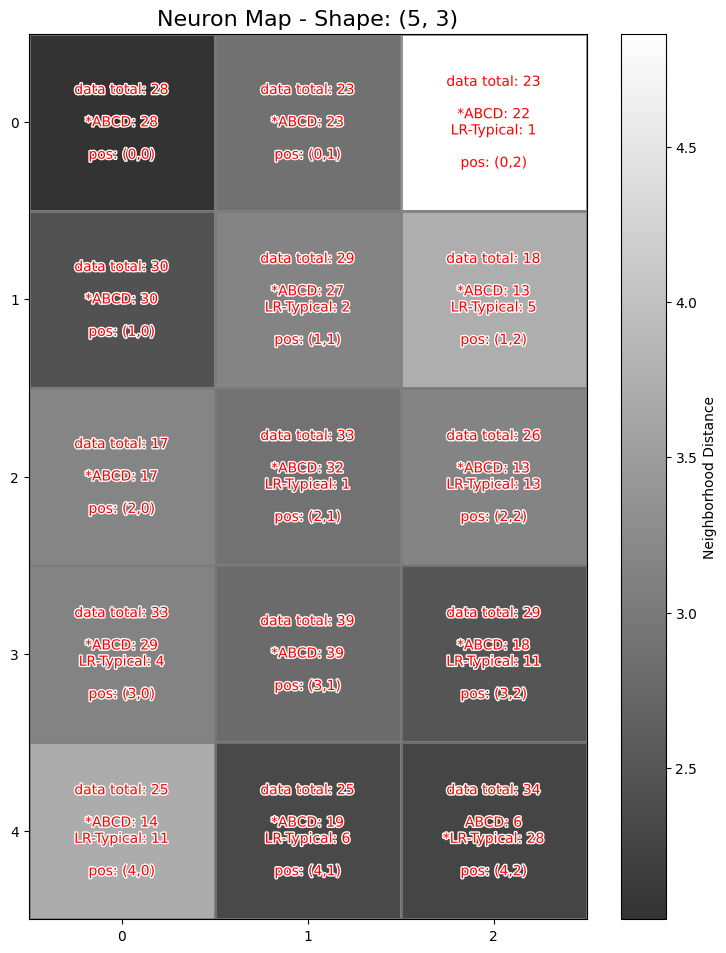

===> TEST tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 842
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 27
  |    |  Level: 2, Position: (0, 0), Number of data: 6
  |    |  Level: 2, Position: (0, 1), Number of data: 1
  |    |  Level: 2, Position: (0, 2), Number of data: 0
  |    |  Level: 2, Position: (0, 3), Number of data: 0
  |    |  Level: 2, Position: (1, 0), Number of data: 1
  |    |  Level: 2, Position: (1, 1), Number of data: 2
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 0
  |    |  Level: 2, Position: (2, 0), Number of data: 14
  |    |  Level: 2, Position: (2, 1), Number of data: 2
  |    |  Level: 2, Position: (2, 2), Number of data: 1
  |    |  Level: 2, Position: (2, 3), Number of data: 0
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 4
  |    |  Level: 2, Position: (0, 0), Number of data: 0
  |    |  Level: 2, P

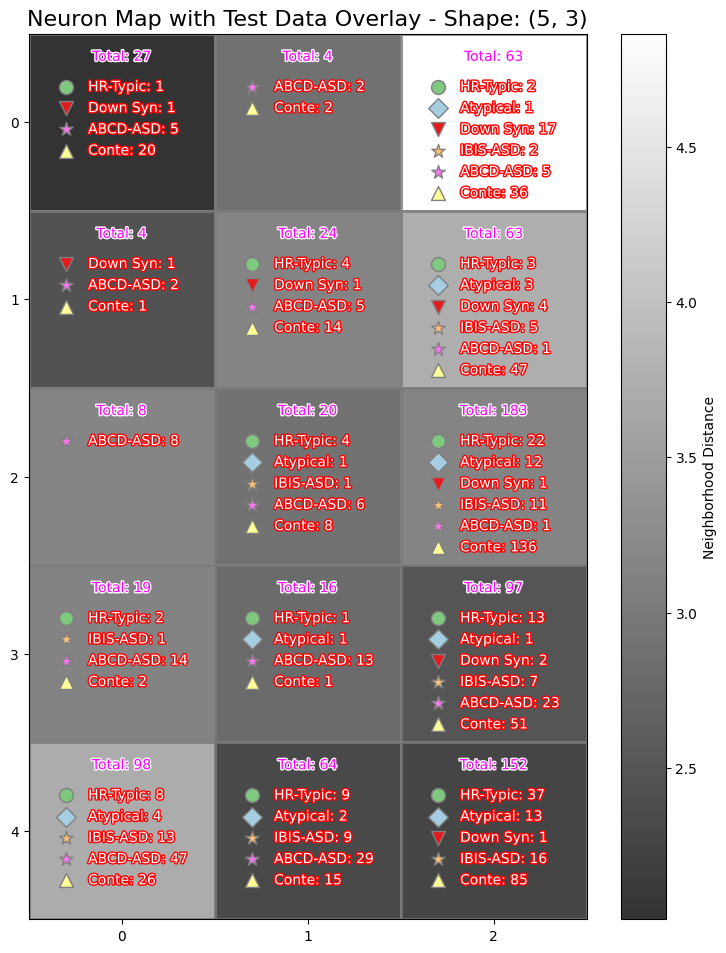

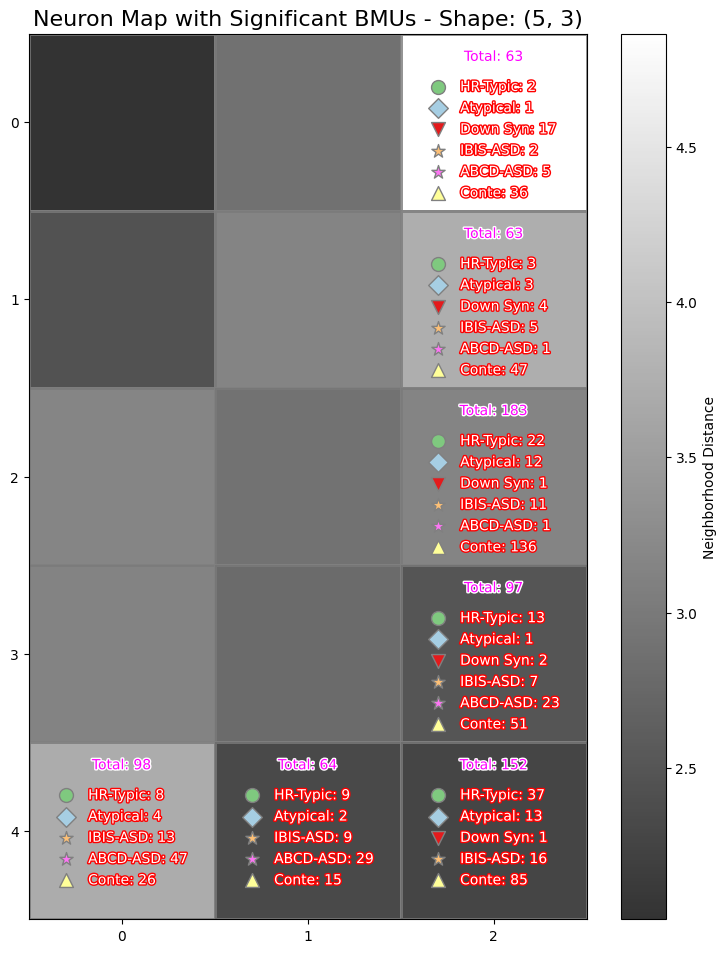

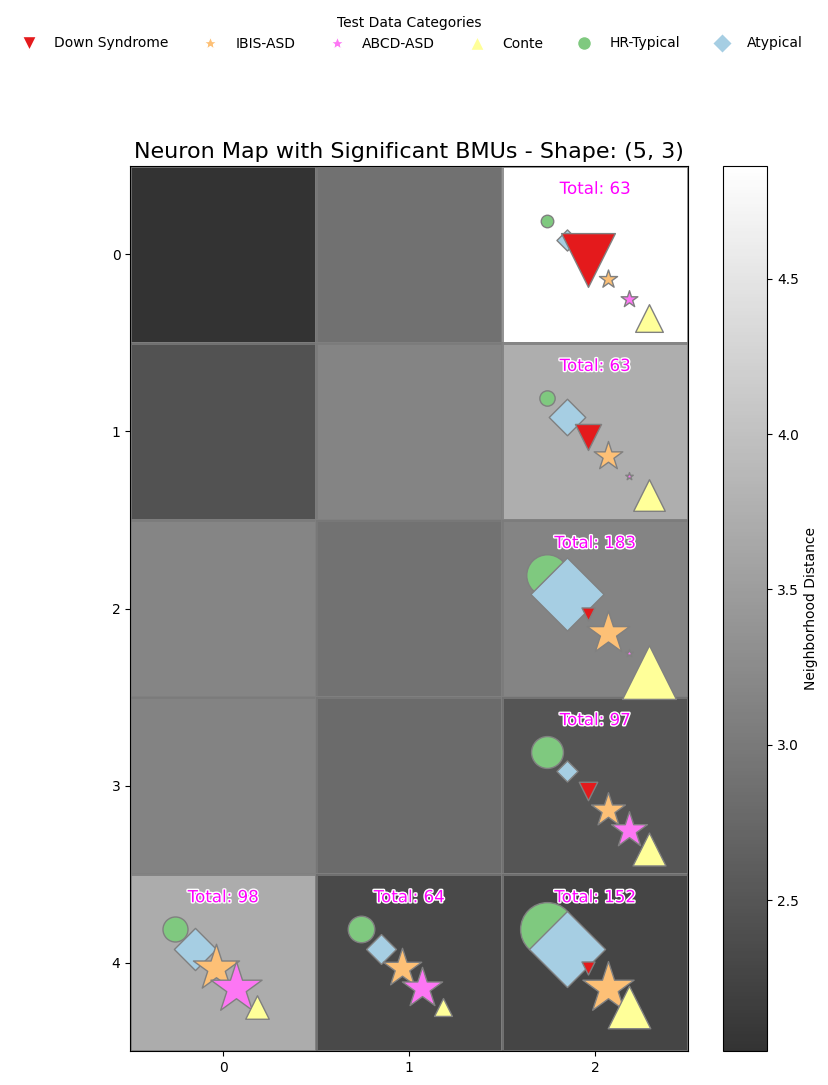

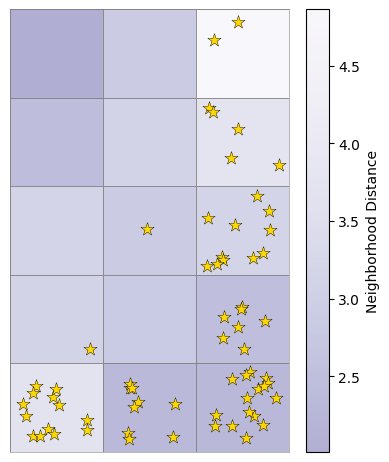

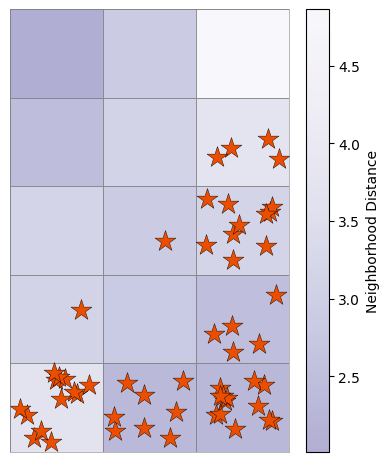

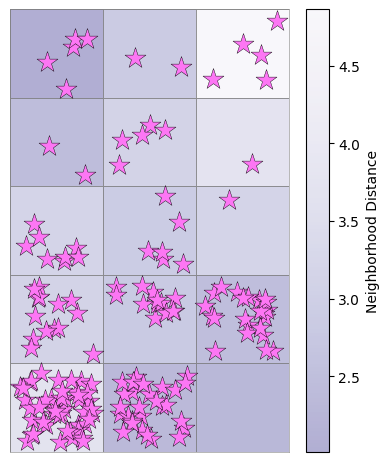

Neuron has NO child map
IBIS-ASD


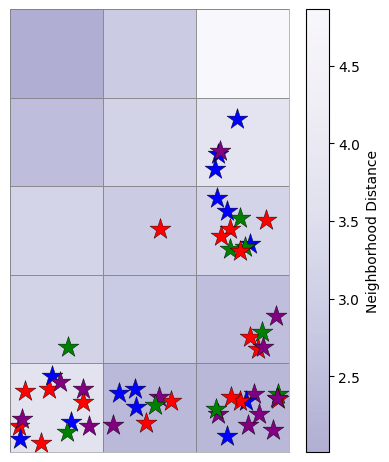

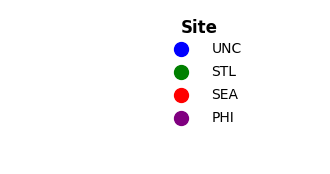

LR-Typical


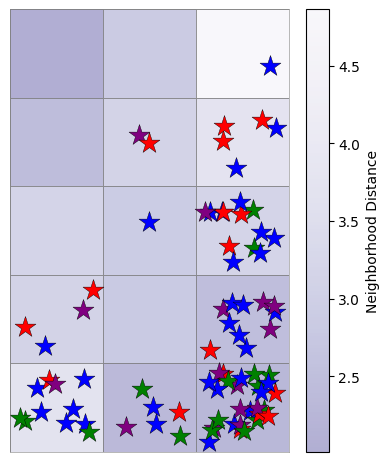

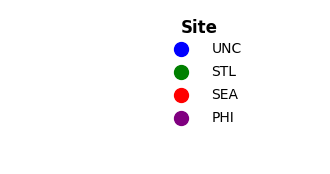

ABCD_ASD


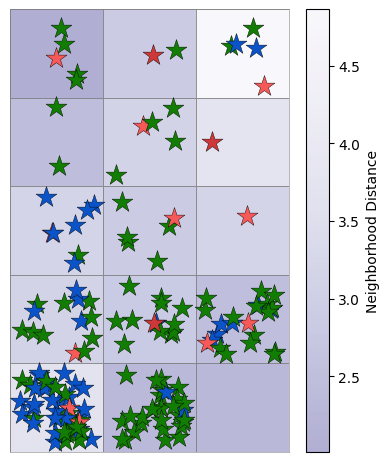

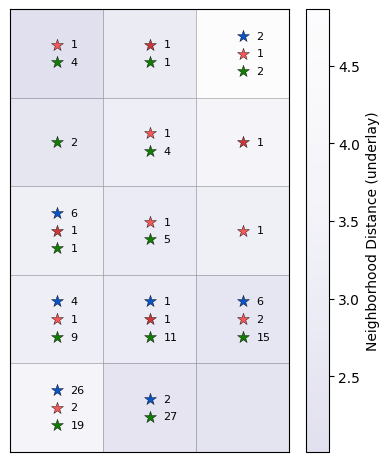

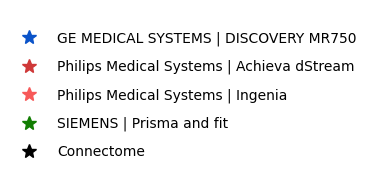

ABCD_INLIER


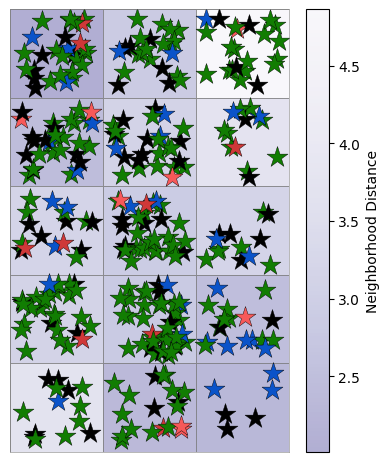

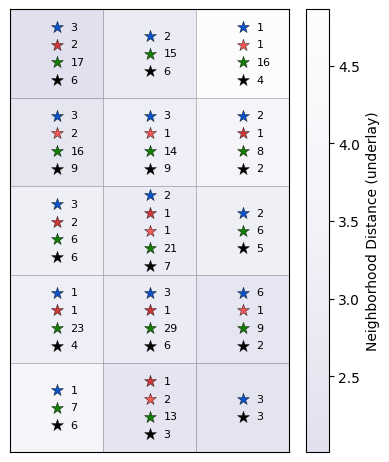

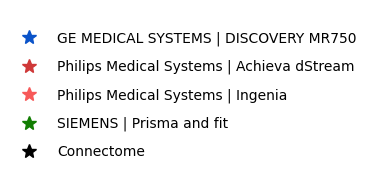

In [107]:
position_list = []

get_and_plot_neuron_by_position_list(train_mapped_zero_unit,test_mapped_zero_unit, position_list, marker_size=250)

Neuron at: (0,0) [(2, 2)] 

===> TRAIN tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 412
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 28
  |    |  Level: 2, Position: (0, 0), Number of data: 2
  |    |  Level: 2, Position: (0, 1), Number of data: 3
  |    |  Level: 2, Position: (0, 2), Number of data: 3
  |    |  Level: 2, Position: (0, 3), Number of data: 1
  |    |  Level: 2, Position: (1, 0), Number of data: 4
  |    |  Level: 2, Position: (1, 1), Number of data: 3
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 1
  |    |  Level: 2, Position: (2, 0), Number of data: 6
  |    |  Level: 2, Position: (2, 1), Number of data: 1
  |    |  Level: 2, Position: (2, 2), Number of data: 2
  |    |  Level: 2, Position: (2, 3), Number of data: 2
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 23
  |    |  Level: 2, Position: (0, 0), Number of 

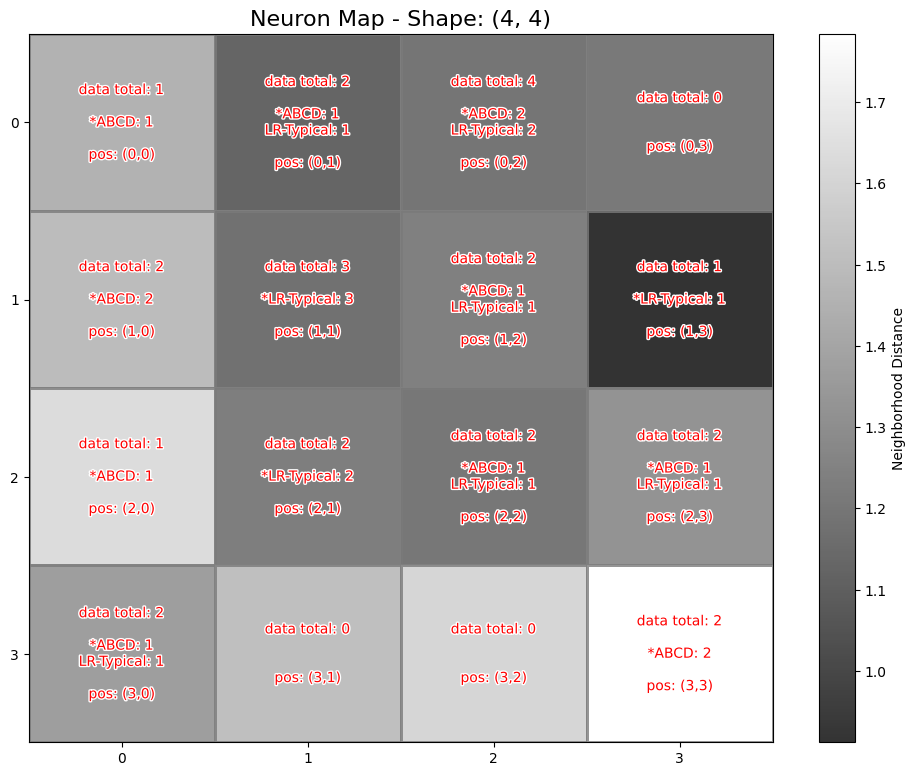

===> TEST tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 842
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 27
  |    |  Level: 2, Position: (0, 0), Number of data: 6
  |    |  Level: 2, Position: (0, 1), Number of data: 1
  |    |  Level: 2, Position: (0, 2), Number of data: 0
  |    |  Level: 2, Position: (0, 3), Number of data: 0
  |    |  Level: 2, Position: (1, 0), Number of data: 1
  |    |  Level: 2, Position: (1, 1), Number of data: 2
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 0
  |    |  Level: 2, Position: (2, 0), Number of data: 14
  |    |  Level: 2, Position: (2, 1), Number of data: 2
  |    |  Level: 2, Position: (2, 2), Number of data: 1
  |    |  Level: 2, Position: (2, 3), Number of data: 0
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 4
  |    |  Level: 2, Position: (0, 0), Number of data: 0
  |    |  Level: 2, P

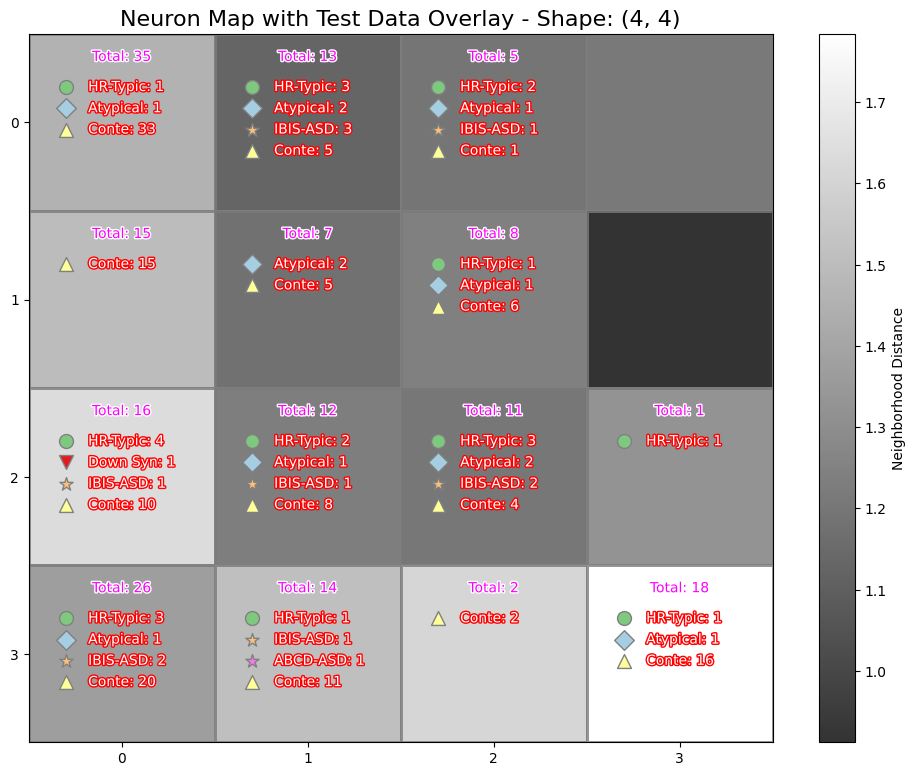

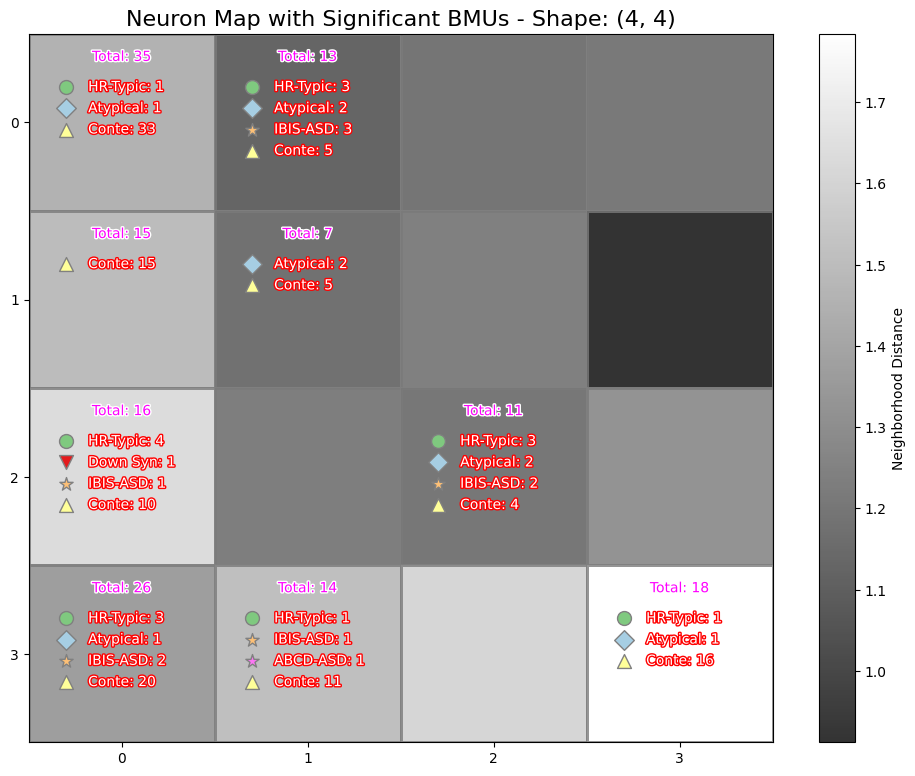

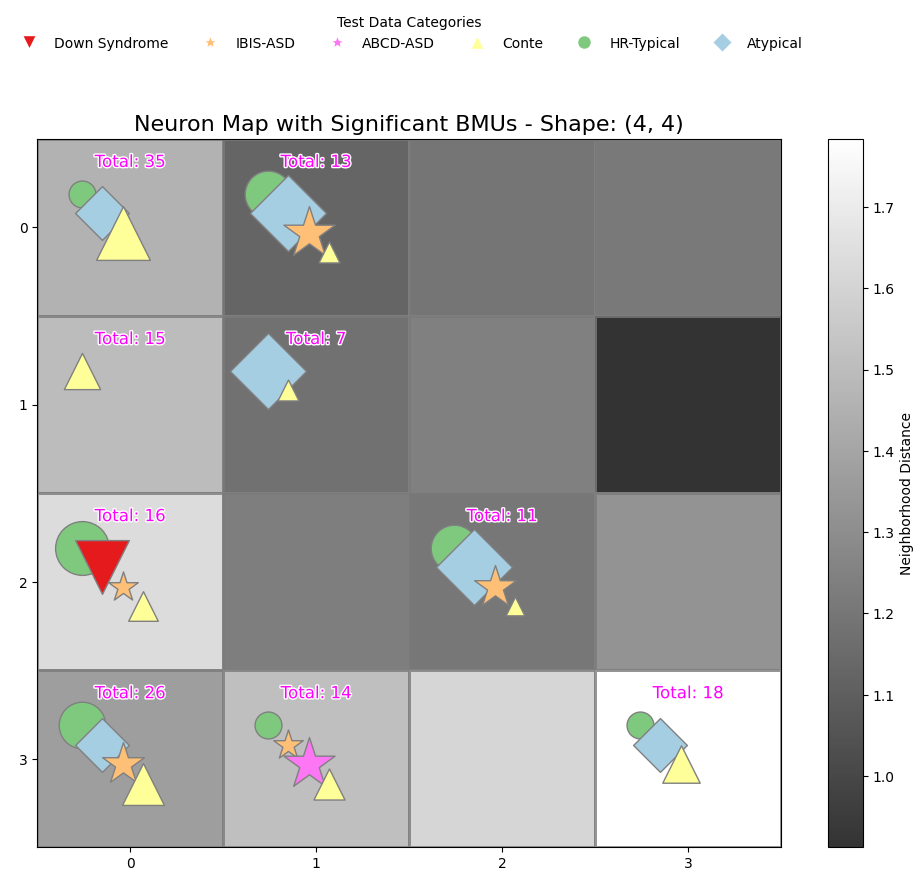

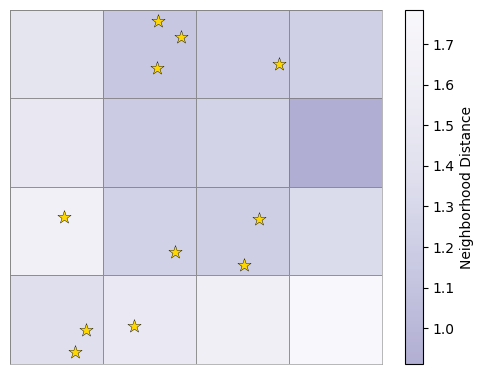

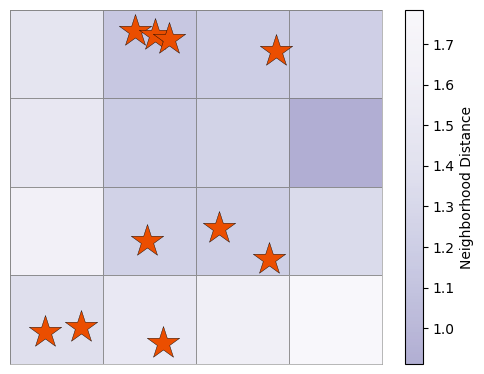

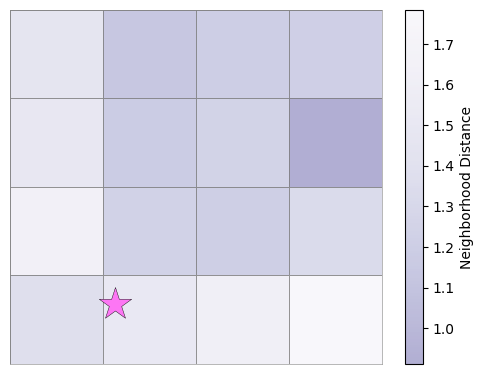

Neuron has NO child map
IBIS-ASD


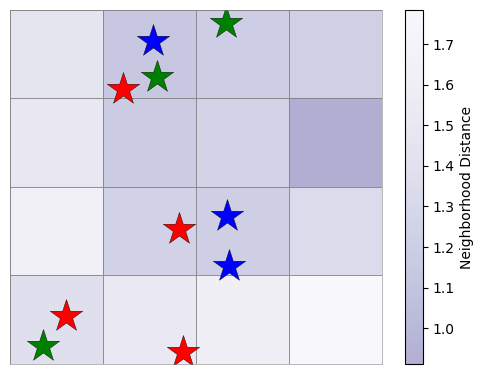

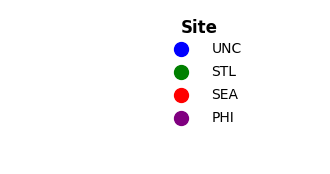

LR-Typical


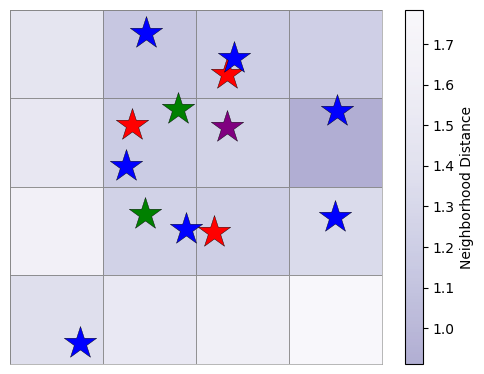

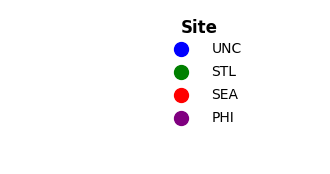

ABCD_ASD


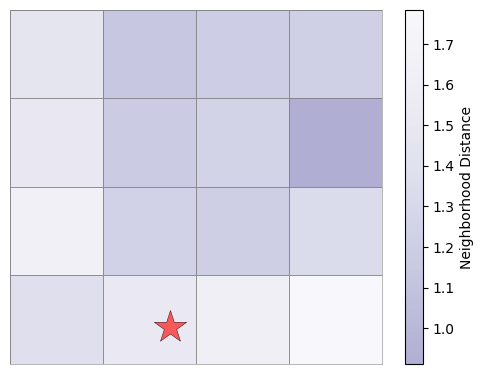

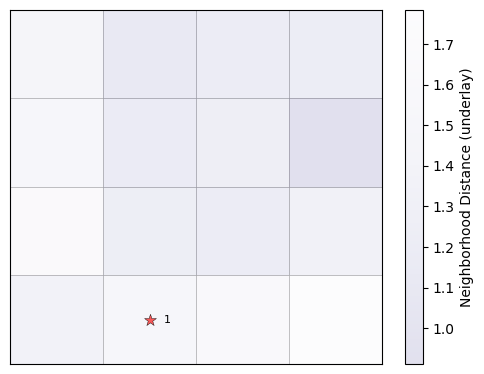

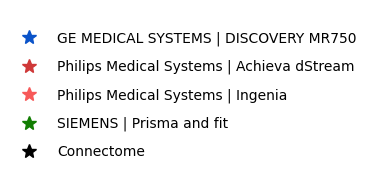

ABCD_INLIER


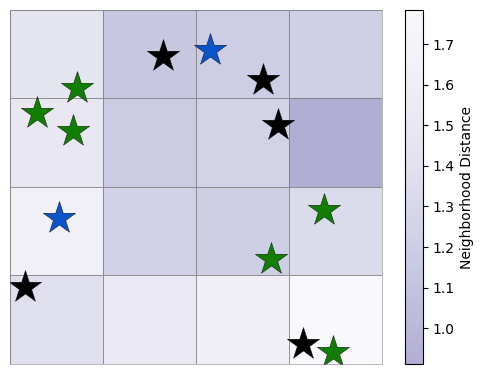

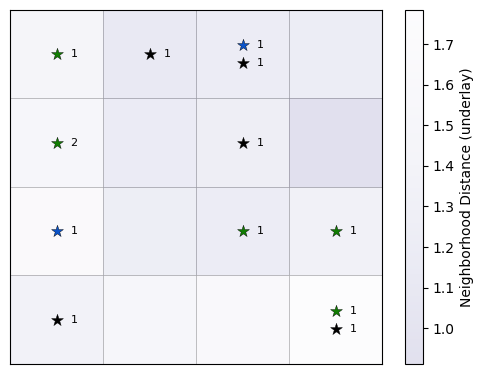

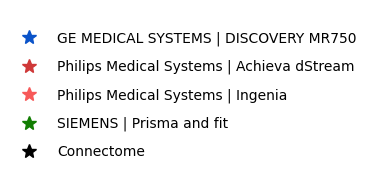

In [108]:
position_list = [(2,2)]

get_and_plot_neuron_by_position_list(train_mapped_zero_unit,test_mapped_zero_unit, position_list, marker_size=600)

Neuron at: (0,0) [(2, 1)] 

===> TRAIN tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 412
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 28
  |    |  Level: 2, Position: (0, 0), Number of data: 2
  |    |  Level: 2, Position: (0, 1), Number of data: 3
  |    |  Level: 2, Position: (0, 2), Number of data: 3
  |    |  Level: 2, Position: (0, 3), Number of data: 1
  |    |  Level: 2, Position: (1, 0), Number of data: 4
  |    |  Level: 2, Position: (1, 1), Number of data: 3
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 1
  |    |  Level: 2, Position: (2, 0), Number of data: 6
  |    |  Level: 2, Position: (2, 1), Number of data: 1
  |    |  Level: 2, Position: (2, 2), Number of data: 2
  |    |  Level: 2, Position: (2, 3), Number of data: 2
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 23
  |    |  Level: 2, Position: (0, 0), Number of 

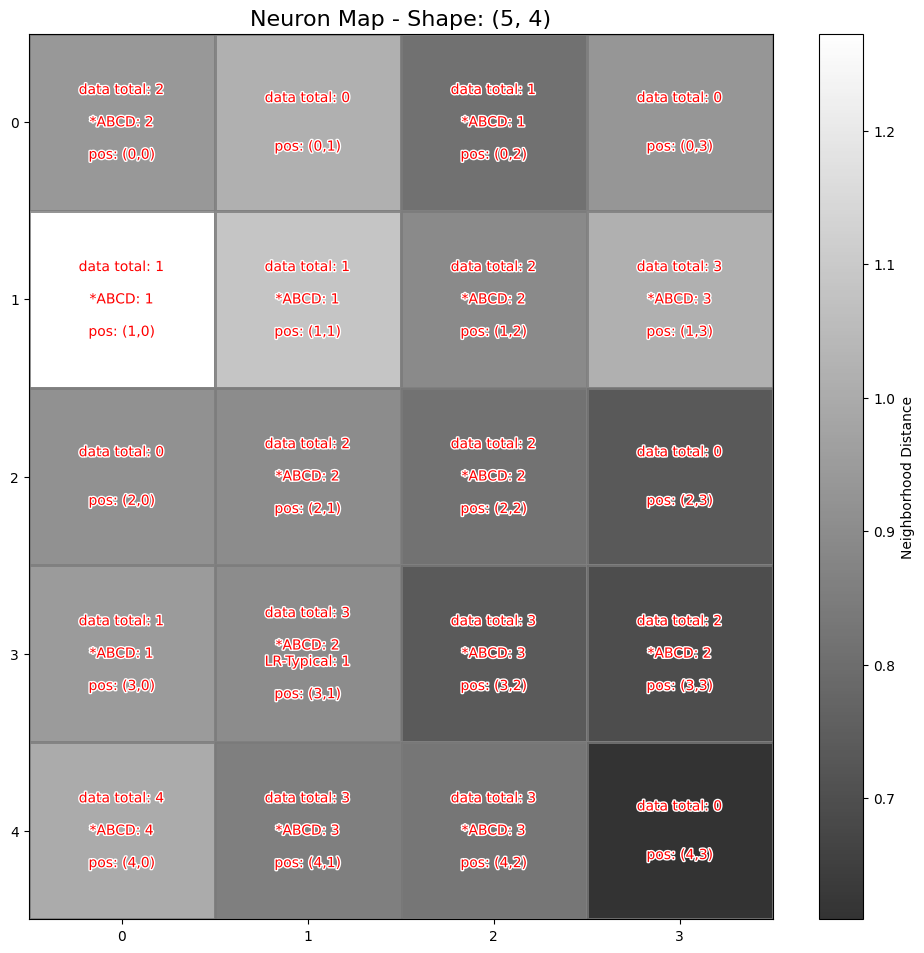

===> TEST tree structure:

Level: 0, Position: (0, 0), Child map size: (5, 3), Number of data: 842
  |  Level: 1, Position: (0, 0), Child map size: (3, 4), Number of data: 27
  |    |  Level: 2, Position: (0, 0), Number of data: 6
  |    |  Level: 2, Position: (0, 1), Number of data: 1
  |    |  Level: 2, Position: (0, 2), Number of data: 0
  |    |  Level: 2, Position: (0, 3), Number of data: 0
  |    |  Level: 2, Position: (1, 0), Number of data: 1
  |    |  Level: 2, Position: (1, 1), Number of data: 2
  |    |  Level: 2, Position: (1, 2), Number of data: 0
  |    |  Level: 2, Position: (1, 3), Number of data: 0
  |    |  Level: 2, Position: (2, 0), Number of data: 14
  |    |  Level: 2, Position: (2, 1), Number of data: 2
  |    |  Level: 2, Position: (2, 2), Number of data: 1
  |    |  Level: 2, Position: (2, 3), Number of data: 0
  |  Level: 1, Position: (0, 1), Child map size: (4, 5), Number of data: 4
  |    |  Level: 2, Position: (0, 0), Number of data: 0
  |    |  Level: 2, P

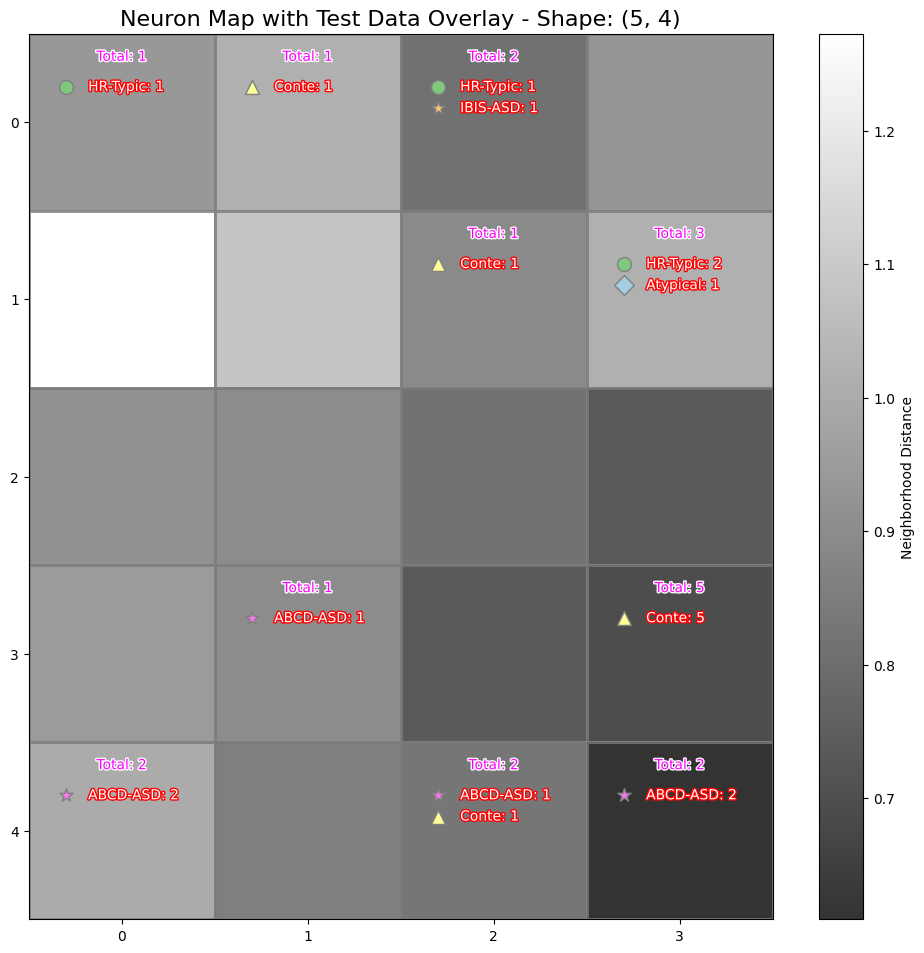

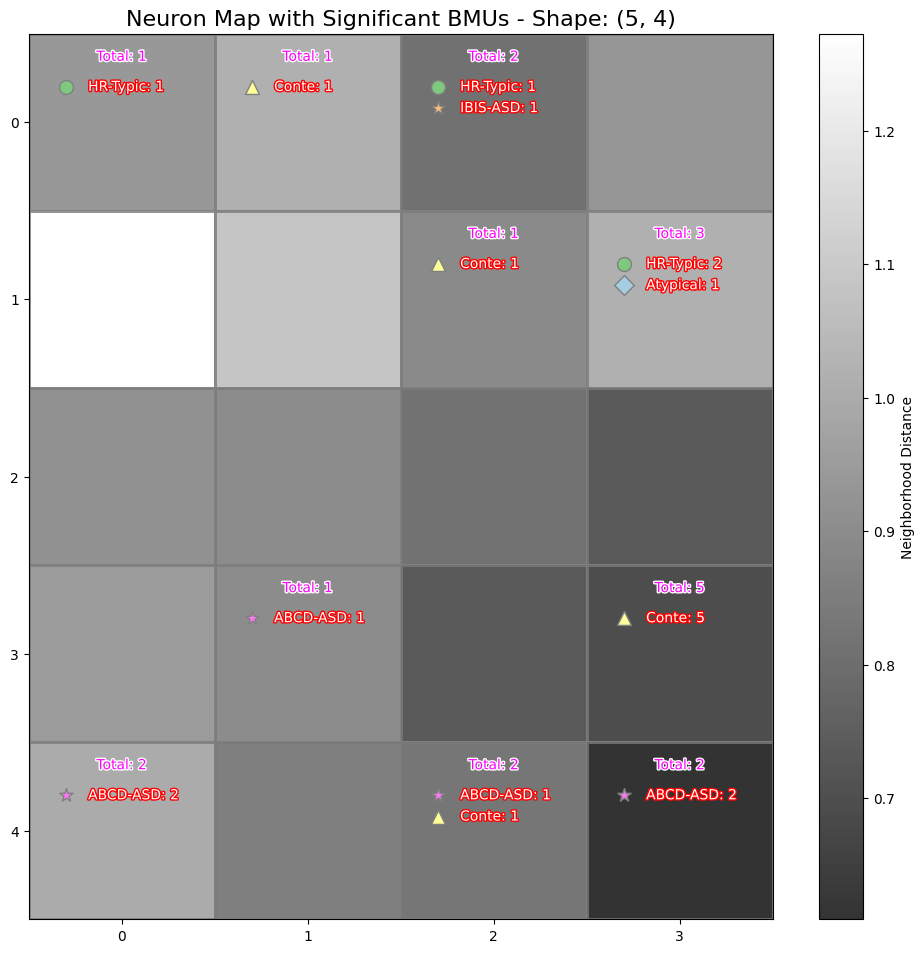

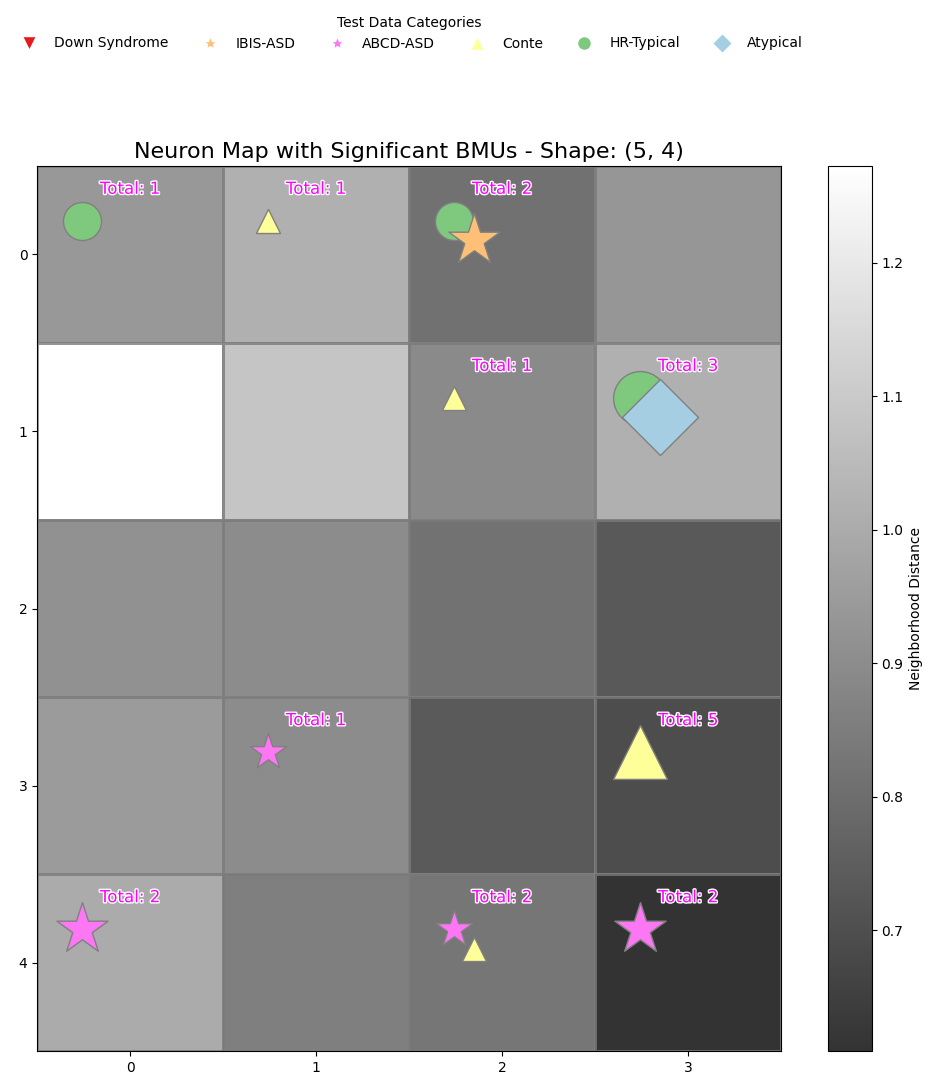

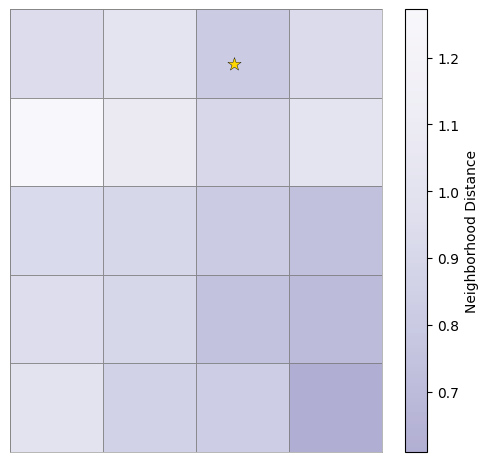

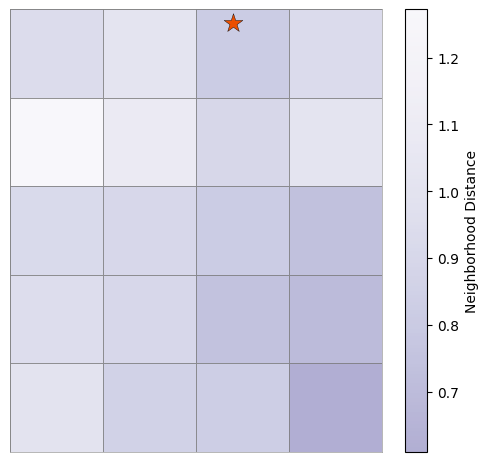

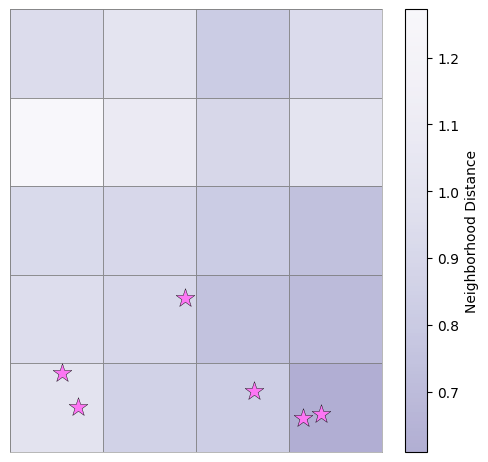

Neuron has NO child map
IBIS-ASD


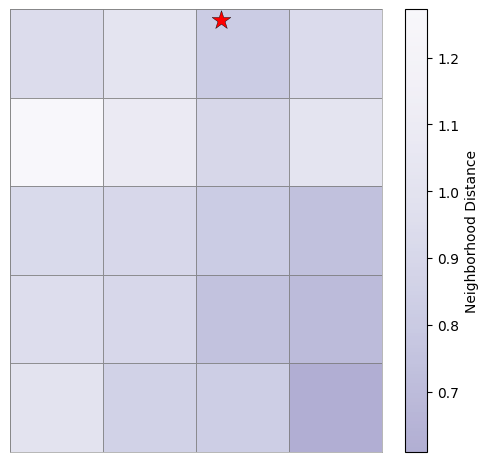

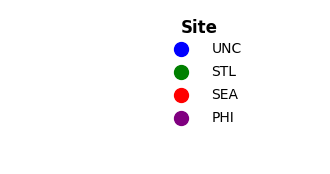

LR-Typical


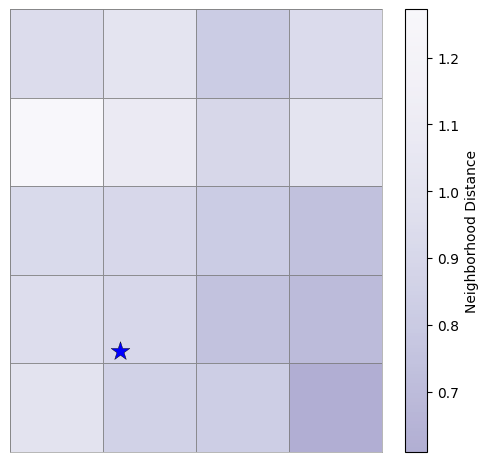

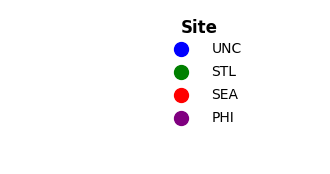

ABCD_ASD


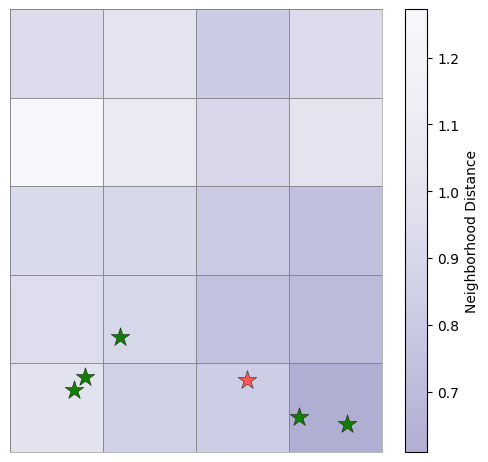

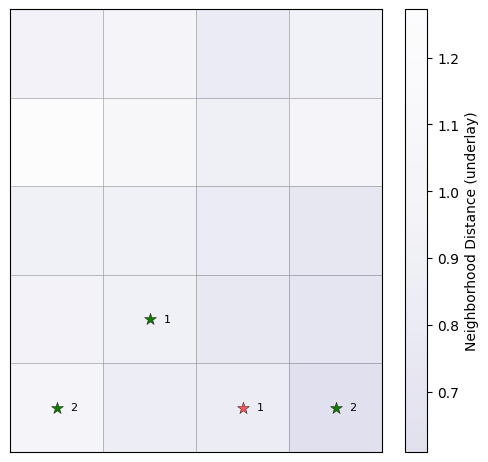

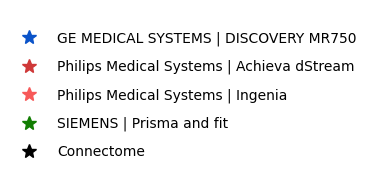

ABCD_INLIER


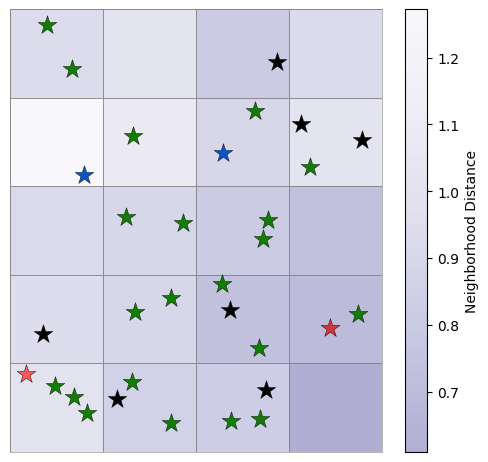

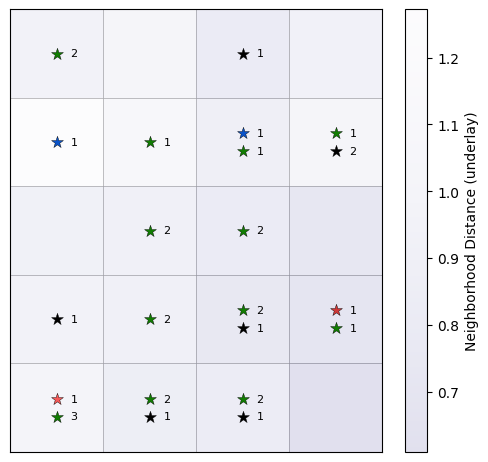

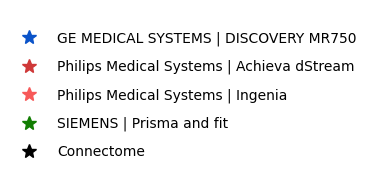

In [109]:
position_list = [(2,1)]

get_and_plot_neuron_by_position_list(train_mapped_zero_unit,test_mapped_zero_unit, position_list)